In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 32.1 MB/s eta 0:00:00


In [ ]:
!pip install kneed

In [ ]:
!pip install plot_metric

In [ ]:
!python -m spacy download 'en_core_web_lg'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install language_tool_python

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296185 sha256=4b008040788b4a6c8264f93af99cf1ce50b038b1ac5f10ec908cfc943dd3e2b2
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import pandas as pd
import numpy as np
import language_tool_python
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import fasttext ## embedings
from spacy.lang.es.stop_words import STOP_WORDS
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/bases/"

In [ ]:
archivo_tsv = "training_set_rel3.tsv"
df = pd.read_csv(path + archivo_tsv, delimiter='\t', encoding='latin1')
df.head(2)


essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   

   rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
0             NaN             NaN            NaN  ...            NaN   
1             NaN             NaN            NaN  ...            NaN   

   rater2_trait4  rater2_trait5  rater2_trait6  rater3_trait1  rater3_trait2  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   

   rater3_trait3  rater3_trait4  rater3_trait5  rater3_trait6  
0            NaN            NaN            NaN            NaN  
1            NaN            NaN            NaN            NaN  

[2 rows x 28 columns]

In [ ]:
# Lista de las columnas que deseas conservar
columnas = ['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'domain1_score']

# Filtrar el DataFrame para que solo contenga estas columnas
df = df[columnas]
df.head()


essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  domain1_score  
0               4               4              8  
1               5               4              9  
2               4               3              7  
3               5               5             10  
4               4               4              8

## Correción ortográfica de un texto

In [ ]:
tool = language_tool_python.LanguageTool('en')

INFO:language_tool_python.download_lt:Unzipping /tmp/tmphs8cf7yk.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [ ]:
l = tool.check(df['essay'][0])
c = language_tool_python.utils.correct(df['essay'][0], l)

In [ ]:
for correccion in l:
    print(correccion)

Offset 186, length 1, Rule ID: SPACE_BEFORE_PARENTHESIS
Message: It appears that a white space is missing.
Suggestion:  (
...w people, helps us learn about the globe(astronomy) and keeps us out of troble! T...
                                           ^
Offset 239, length 4, Rule ID: EN_CONTRACTION_SPELLING
Message: Possible spelling mistake found.
Suggestion: Don't
...nd keeps us out of troble! Thing about! Dont you think so? How would you feel if you...
                                           ^^^^
Offset 338, length 4, Rule ID: EVERY_EVER
Message: Did you mean “every”?
Suggestion: every
...lways on the phone with friends! Do you ever time to chat with your friends or buisn...
                                           ^^^^
Offset 406, length 1, Rule ID: QUESTION_MARK
Message: If this is a question, use a question mark.
Suggestion: ?
...friends or buisness partner about things. Well now - there's a new way to chat th...
                                           ^
Offset 712, leng

## Correción ortográfica de todos los documentos

In [ ]:
%%time
df['matches'] = df['essay'].apply(lambda txt: tool.check(txt)) # Identificar reglas gramaticales para corregir
df['corrections'] = df.apply(lambda l: len(l['matches']), axis=1) # Número de correciones hechas dentro del texto
df['corrected'] = df.apply(lambda l: language_tool_python.utils.correct(l['essay'], l['matches']),
                           axis=1) # obtener texto corregido

CPU times: user 1min 38s, sys: 4.64 s, total: 1min 43s
Wall time: 22min 27s


In [ ]:
df.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   rater1_domain1  rater2_domain1  domain1_score  \
0               4               4              8   
1               5               4              9   

                                             matches  corrections  \
0  [Offset 186, length 1, Rule ID: SPACE_BEFORE_P...            8   
1  [Offset 272, length 4, Rule ID: SENT_START_CON...           11   

                                           corrected  
0  Dear local newspaper, I think effects computer...  
1  Dear @CAPS1 @CAPS2, I believe that using compu...

In [ ]:
## Exportar cuadro de salida de la corrección ortográfica en formato pkl
df.to_pickle(path + 'training_corr_NLP_Ensayos.pkl')

## Lectura de documento corregido ortográficamente

Esto permite iniciar desde este punto una vez se guarda para no hacer el procesamiento de correción en caso de que la BD sea muy grande y tome mucho tiempo

In [ ]:
datos = pd.read_pickle(path + 'training_corr_NLP_Ensayos.pkl')
datos.head(2)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   

   rater1_domain1  rater2_domain1  domain1_score  \
0               4               4              8   
1               5               4              9   

                                             matches  corrections  \
0  [Offset 186, length 1, Rule ID: SPACE_BEFORE_P...            8   
1  [Offset 272, length 4, Rule ID: SENT_START_CON...           11   

                                           corrected  
0  Dear local newspaper, I think effects computer...  
1  Dear @CAPS1 @CAPS2, I believe that using compu...

## Tokenización y lematización

In [ ]:
%%time
sents = [] # formar listas con las oraciones de cada texto
tokens = [] # separar las palabras y caracteres de cada texto
lemma = [] # convertir las palabras en su raíz (ayuda --> ayudar)
pos = [] # indica en cada posición si la palabra es pronombre, conjunción, etc
ner = [] # indica si la palabra es considerada una entidad (nombre propio importante en el texto)

stop_words = set(STOP_WORDS)
# stop_words.update(punctuation) # remove it if you need punctuation

nlp = spacy.load('en_core_web_lg') ## INGLÉS

# suppress numpy warnings
#np.warnings.filterwarnings('ignore')

for essay in nlp.pipe(datos['corrected'], batch_size=100, n_process=4):
    if essay.is_parsed:
        tokens.append([e.text for e in essay])
        sents.append([sent.text.strip() for sent in essay.sents])
        pos.append([e.pos_ for e in essay])
        ner.append([e.text for e in essay.ents])
        lemma.append([n.lemma_ for n in essay])
    else:
        tokens.append(None)
        lemma.append(None)
        pos.append(None)
        sents.append(None)
        ner.append(None)

datos['tokens'] = tokens
datos['lemma'] = lemma
datos['pos'] = pos
datos['sents'] = sents
datos['ner'] = ner

<timed exec>:16: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.


CPU times: user 1min 15s, sys: 4.71 s, total: 1min 20s
Wall time: 8min 54s


In [ ]:
datos.head(1)

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   

   rater1_domain1  rater2_domain1  domain1_score  \
0               4               4              8   

                                             matches  corrections  \
0  [Offset 186, length 1, Rule ID: SPACE_BEFORE_P...            8   

                                           corrected  \
0  Dear local newspaper, I think effects computer...   

                                              tokens  \
0  [Dear, local, newspaper, ,, I, think, effects,...   

                                               lemma  \
0  [dear, local, newspaper, ,, I, think, effect, ...   

                                                 pos  \
0  [ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...   

                                               sents  \
0  [Dear local newspaper, I think effects compute...   

                                ner  
0  [@ORGANIZATION2, @CAPS1, @CAPS2]

In [ ]:
datos.iloc[0]["tokens"]

['Dear',
 'local',
 'newspaper',
 ',',
 'I',
 'think',
 'effects',
 'computers',
 'have',
 'on',
 'people',
 'are',
 'great',
 'learning',
 'skills',
 '/',
 'affects',
 'because',
 'they',
 'give',
 'us',
 'time',
 'to',
 'chat',
 'with',
 'friends',
 '/',
 'new',
 'people',
 ',',
 'helps',
 'us',
 'learn',
 'about',
 'the',
 'globe',
 '(',
 'astronomy',
 ')',
 'and',
 'keeps',
 'us',
 'out',
 'of',
 'troble',
 '!',
 'Thing',
 'about',
 '!',
 'Do',
 "n't",
 'you',
 'think',
 'so',
 '?',
 'How',
 'would',
 'you',
 'feel',
 'if',
 'your',
 'teenager',
 'is',
 'always',
 'on',
 'the',
 'phone',
 'with',
 'friends',
 '!',
 'Do',
 'you',
 'every',
 'time',
 'to',
 'chat',
 'with',
 'your',
 'friends',
 'or',
 'buisness',
 'partner',
 'about',
 'things',
 '?',
 'Well',
 'now',
 '-',
 'there',
 "'s",
 'a',
 'new',
 'way',
 'to',
 'chat',
 'the',
 'computer',
 ',',
 'theirs',
 'plenty',
 'of',
 'sites',
 'on',
 'the',
 'internet',
 'to',
 'do',
 'so',
 ':',
 '@ORGANIZATION1',
 ',',
 '@ORGANIZA

In [ ]:
datos.iloc[0]["lemma"]

['dear',
 'local',
 'newspaper',
 ',',
 'I',
 'think',
 'effect',
 'computer',
 'have',
 'on',
 'people',
 'be',
 'great',
 'learning',
 'skill',
 '/',
 'affect',
 'because',
 'they',
 'give',
 'we',
 'time',
 'to',
 'chat',
 'with',
 'friend',
 '/',
 'new',
 'people',
 ',',
 'help',
 'we',
 'learn',
 'about',
 'the',
 'globe',
 '(',
 'astronomy',
 ')',
 'and',
 'keep',
 'we',
 'out',
 'of',
 'troble',
 '!',
 'the',
 'about',
 '!',
 'do',
 'not',
 'you',
 'think',
 'so',
 '?',
 'how',
 'would',
 'you',
 'feel',
 'if',
 'your',
 'teenager',
 'be',
 'always',
 'on',
 'the',
 'phone',
 'with',
 'friend',
 '!',
 'do',
 'you',
 'every',
 'time',
 'to',
 'chat',
 'with',
 'your',
 'friend',
 'or',
 'buisness',
 'partner',
 'about',
 'thing',
 '?',
 'well',
 'now',
 '-',
 'there',
 'be',
 'a',
 'new',
 'way',
 'to',
 'chat',
 'the',
 'computer',
 ',',
 'theirs',
 'plenty',
 'of',
 'site',
 'on',
 'the',
 'internet',
 'to',
 'do',
 'so',
 ':',
 '@ORGANIZATION1',
 ',',
 '@ORGANIZATION2',
 ',',


In [ ]:
datos.iloc[0]["pos"]

['ADJ',
 'ADJ',
 'NOUN',
 'PUNCT',
 'PRON',
 'VERB',
 'NOUN',
 'NOUN',
 'AUX',
 'ADP',
 'NOUN',
 'AUX',
 'ADJ',
 'NOUN',
 'NOUN',
 'PUNCT',
 'VERB',
 'SCONJ',
 'PRON',
 'VERB',
 'PRON',
 'NOUN',
 'PART',
 'VERB',
 'ADP',
 'NOUN',
 'SYM',
 'ADJ',
 'NOUN',
 'PUNCT',
 'VERB',
 'PRON',
 'VERB',
 'ADP',
 'DET',
 'NOUN',
 'PUNCT',
 'NOUN',
 'PUNCT',
 'CCONJ',
 'VERB',
 'PRON',
 'ADP',
 'ADP',
 'NOUN',
 'PUNCT',
 'VERB',
 'ADP',
 'PUNCT',
 'AUX',
 'PART',
 'PRON',
 'VERB',
 'ADV',
 'PUNCT',
 'SCONJ',
 'AUX',
 'PRON',
 'VERB',
 'SCONJ',
 'PRON',
 'NOUN',
 'AUX',
 'ADV',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'NOUN',
 'PUNCT',
 'VERB',
 'PRON',
 'DET',
 'NOUN',
 'PART',
 'VERB',
 'ADP',
 'PRON',
 'NOUN',
 'CCONJ',
 'NOUN',
 'NOUN',
 'ADP',
 'NOUN',
 'PUNCT',
 'INTJ',
 'ADV',
 'PUNCT',
 'PRON',
 'VERB',
 'DET',
 'ADJ',
 'NOUN',
 'PART',
 'VERB',
 'DET',
 'NOUN',
 'PUNCT',
 'PRON',
 'NOUN',
 'ADP',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'PART',
 'AUX',
 'ADV',
 'PUNCT',
 'PROPN',
 'PUNCT',
 'PROPN',
 'PUN

In [ ]:
datos.iloc[0]["sents"]

['Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe (astronomy) and keeps us out of troble!',
 'Thing about!',
 "Don't you think so?",
 'How would you feel if your teenager is always on the phone with friends!',
 'Do you every time to chat with your friends or buisness partner about things?',
 "Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect.",
 'Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off because you want to use it.',
 'How did you learn about other countrys/states outside yours?',
 "Well I have by computer/internet, it's a new way to learn about what going on in our time!",
 "You might think your child spends a lot of time on the computer, bu

In [ ]:
datos.iloc[0]["ner"]

['@ORGANIZATION2', '@CAPS1', '@CAPS2']

## Stopwords y agregación de componentes de semántica y sintaxis

In [ ]:
%%time
# Conteos de categorías gramaticales
datos['token_count'] = datos.apply(lambda x: len(x['tokens']), axis=1)
datos['unique_token_count'] = datos.apply(lambda x: len(set(x['tokens'])), axis=1)
datos['nostop_count'] = datos.apply(lambda x: len([token for token in x['tokens'] if token not in stop_words]), axis=1)
datos['sent_count'] = datos.apply(lambda x: len(x['sents']), axis=1)
datos['ner_count'] = datos.apply(lambda x: len(x['ner']), axis=1)
datos['comma'] = datos.apply(lambda x: x['corrected'].count(','), axis=1)
datos['question'] = datos.apply(lambda x: x['corrected'].count('?'), axis=1)
datos['exclamation'] = datos.apply(lambda x: x['corrected'].count('!'), axis=1)
datos['quotation'] = datos.apply(lambda x: x['corrected'].count('"') + x['corrected'].count("'"), axis=1)
datos['organization'] = datos.apply(lambda x: x['corrected'].count(r'@ORGANIZATION'), axis=1)
datos['caps'] = datos.apply(lambda x: x['corrected'].count(r'@CAPS'), axis=1)
datos['person'] = datos.apply(lambda x: x['corrected'].count(r'@PERSON'), axis=1)
datos['location'] = datos.apply(lambda x: x['corrected'].count(r'@LOCATION'), axis=1)
datos['money'] = datos.apply(lambda x: x['corrected'].count(r'@MONEY'), axis=1)
datos['time'] = datos.apply(lambda x: x['corrected'].count(r'@TIME'), axis=1)
datos['date'] = datos.apply(lambda x: x['corrected'].count(r'@DATE'), axis=1)
datos['percent'] = datos.apply(lambda x: x['corrected'].count(r'@PERCENT'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['adj'] = datos.apply(lambda x: x['pos'].count('ADJ'), axis=1)
datos['pron'] = datos.apply(lambda x: x['pos'].count('PRON'), axis=1)
datos['verb'] = datos.apply(lambda x: x['pos'].count('VERB'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['cconj'] = datos.apply(lambda x: x['pos'].count('CCONJ'), axis=1)
datos['adv'] = datos.apply(lambda x: x['pos'].count('ADV'), axis=1)
datos['det'] = datos.apply(lambda x: x['pos'].count('DET'), axis=1)
datos['propn'] = datos.apply(lambda x: x['pos'].count('PROPN'), axis=1)
datos['num'] = datos.apply(lambda x: x['pos'].count('NUM'), axis=1)
datos['part'] = datos.apply(lambda x: x['pos'].count('PART'), axis=1)
datos['intj'] = datos.apply(lambda x: x['pos'].count('INTJ'), axis=1)

CPU times: user 4.49 s, sys: 16.8 ms, total: 4.5 s
Wall time: 4.51 s


In [ ]:
## Exportar tabla de salida
datos.to_pickle(path + 'training_features_NLP_Ensayos.pkl')

In [ ]:
%%time
datos=  pd.read_pickle(path + 'training_features_NLP_Ensayos.pkl')
datos.head(1)

CPU times: user 2.97 s, sys: 937 ms, total: 3.91 s
Wall time: 4.19 s


essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   

   rater1_domain1  rater2_domain1  domain1_score  \
0               4               4              8   

                                             matches  corrections  \
0  [Offset 186, length 1, Rule ID: SPACE_BEFORE_P...            8   

                                           corrected  \
0  Dear local newspaper, I think effects computer...   

                                              tokens  ... adj pron verb cconj  \
0  [Dear, local, newspaper, ,, I, think, effects,...  ...  17   47   53    14   

   adv  det  propn  num  part  intj  
0   15   21      5    0    16     2  

[1 rows x 42 columns]

In [ ]:
datos = datos.get(["essay_id","corrected","tokens","essay_set",
           "corrections","token_count","unique_token_count",
           "nostop_count","sent_count","ner_count","comma","question",
           "exclamation", "quotation", "organization", "caps", "person",
           "location", "money", "time", "date", "percent", "noun", "adj", "pron",
           "verb", "cconj", "adv", "det", "propn", "num", "part", "intj"])
datos.head(1)

essay_id                                          corrected  \
0         1  Dear local newspaper, I think effects computer...   

                                              tokens  essay_set  corrections  \
0  [Dear, local, newspaper, ,, I, think, effects,...          1            8   

   token_count  unique_token_count  nostop_count  sent_count  ner_count  ...  \
0          396                 180           386          16          3  ...   

   adj  pron  verb  cconj  adv  det  propn  num  part  intj  
0   17    47    53     14   15   21      5    0    16     2  

[1 rows x 33 columns]

In [ ]:
datos = datos.rename(columns = {'corrected':'essay'})
datos.head(1)

essay_id                                              essay  \
0         1  Dear local newspaper, I think effects computer...   

                                              tokens  essay_set  corrections  \
0  [Dear, local, newspaper, ,, I, think, effects,...          1            8   

   token_count  unique_token_count  nostop_count  sent_count  ner_count  ...  \
0          396                 180           386          16          3  ...   

   adj  pron  verb  cconj  adv  det  propn  num  part  intj  
0   17    47    53     14   15   21      5    0    16     2  

[1 rows x 33 columns]

In [ ]:
datos.to_pickle(path + 'training_red_neuronal.pkl')

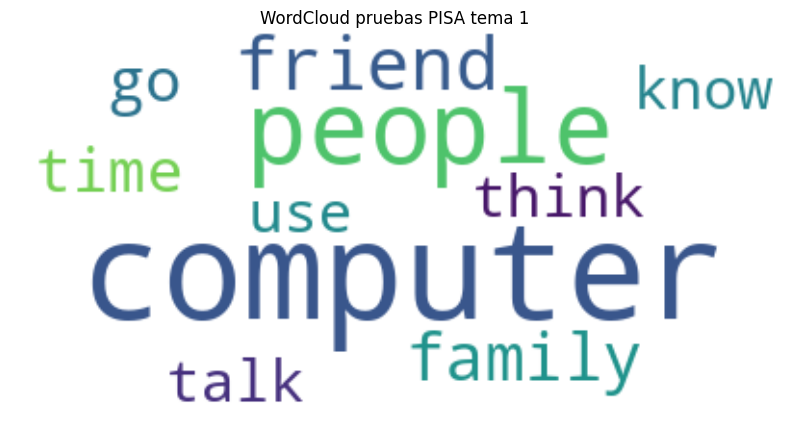

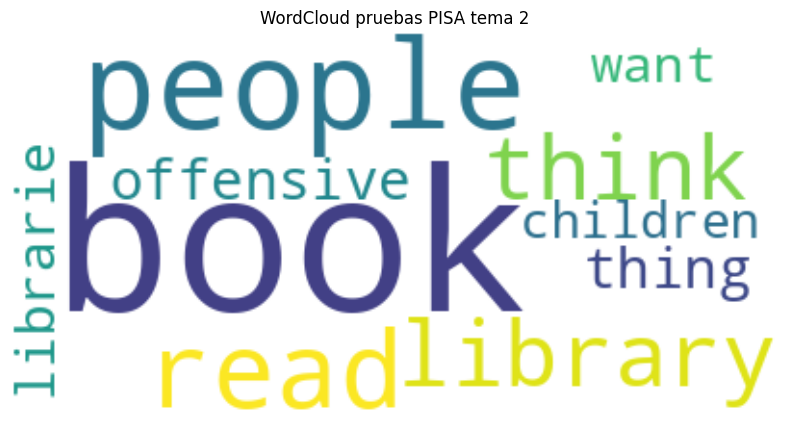

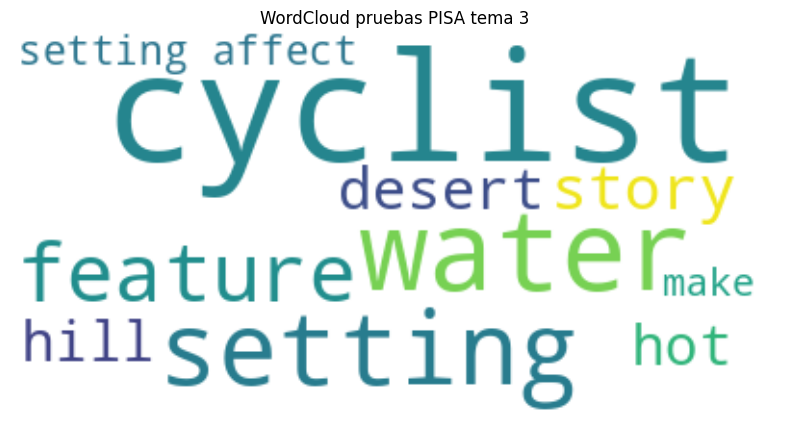

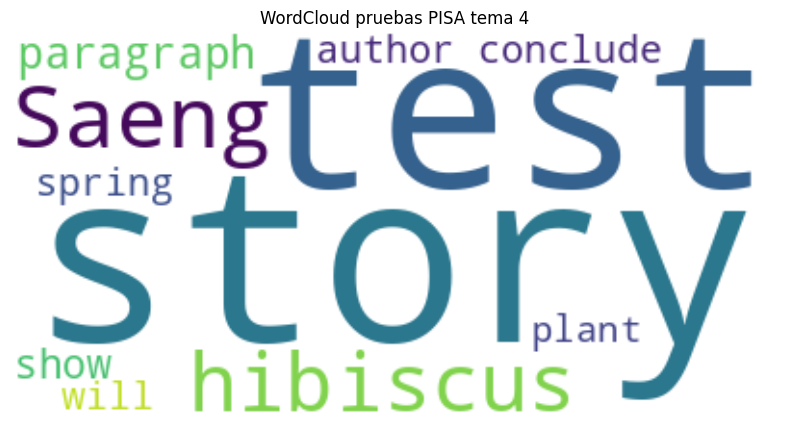

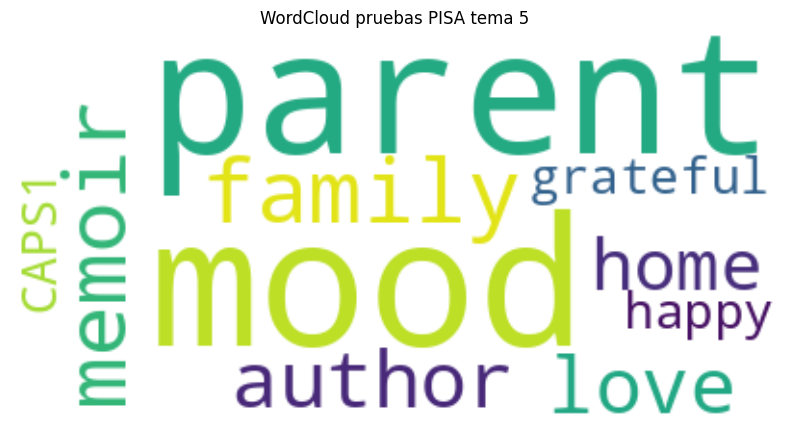

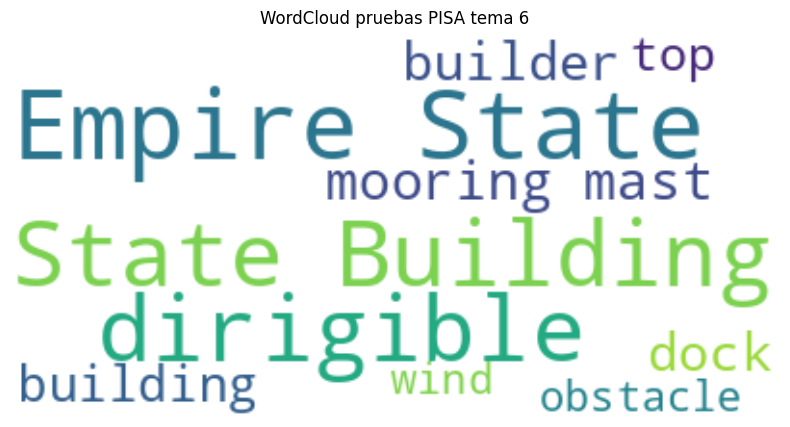

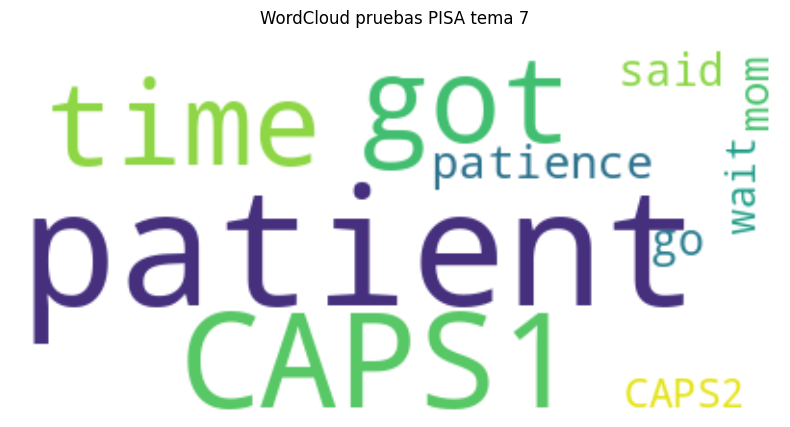

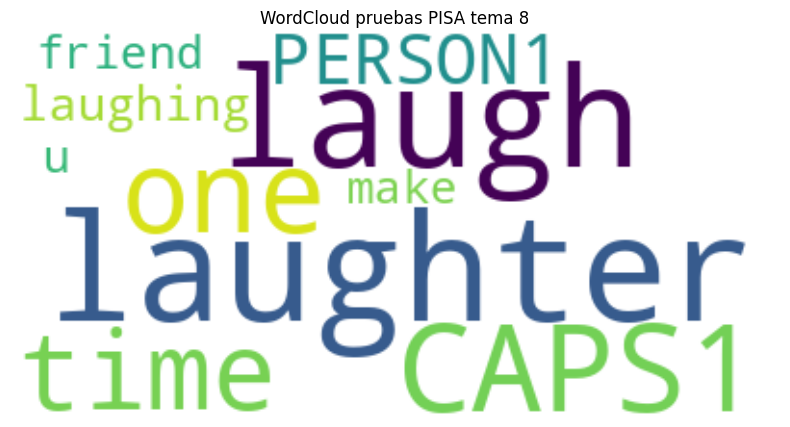

In [ ]:
essay_sets = datos['essay_set'].unique()

for essay_set in essay_sets:
    textos_cluster = datos[datos['essay_set'] == essay_set]['essay']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(textos_cluster.dropna()))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud pruebas PISA tema {essay_set}')
    plt.show()


## INTERPRETACION DE CLUSTER BASADOS EN LA COLUMNA ESSAY SET
### WORDCLOUD TEMA 1:
Se habla en este tema 1 sobre la tecnologia y las relaciones interpersonales de familiares y amigos, y el como se relacionarian entre si.
## WORDCLOUD TEMA 2:
Este trata mas sobre los libros, bibliotecas y el leer en familia niños y personas en genetal.
## WORDCLOUD TEMA 3:
Habla mas sobre los ciclistas, el clima caliente en el desierto talvez sin agua en el entorno.
## WORDCLOUD TEMA 4:
El tema 4 tiene una particularidad de hablar sobre historias de prueba, parrafos y este tema como de autores.
## WORDCLOUD TEMA 5:
Habla masomenos sobre la familia, los recuerdos y el amor.
## WORDCLOUD TEMA 6:
Habla sobre el empire state, construcciones, y muelles.
## WORDCLOUD TEMA 7:
Habla sobre el tiempo, ser paciente y gorras
## WORDCLOUD TEMA 8:
Habla sobre risa, reir con amigos.

In [ ]:
datos = datos.drop(columns=['essay_set'])

In [ ]:
datos['essay'].to_csv(path + 'ensayos_NLP_Ensayos.csv')

In [ ]:
datos.head(1)

essay_id                                              essay  \
0         1  Dear local newspaper, I think effects computer...   

                                              tokens  corrections  \
0  [Dear, local, newspaper, ,, I, think, effects,...            8   

   token_count  unique_token_count  nostop_count  sent_count  ner_count  \
0          396                 180           386          16          3   

   comma  ...  adj  pron  verb  cconj  adv  det  propn  num  part  intj  
0     18  ...   17    47    53     14   15   21      5    0    16     2  

[1 rows x 32 columns]

# 1. MODELO LDA

In [ ]:
data = datos.get(['essay','essay_id'])
data.head(2)

essay  essay_id
0  Dear local newspaper, I think effects computer...         1
1  Dear @CAPS1 @CAPS2, I believe that using compu...         2

### Procesamiento para LDA

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import stanza
import re
from nltk.corpus import stopwords
import en_core_web_lg
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma')

#"" Número de stopwords en nltk
stop_nltk = stopwords.words('english')
print("nltk :",len(stop_nltk))

## Número de stopwords en spacy
nlp = en_core_web_lg.load()
stop_spacy = nlp.Defaults.stop_words
print("spacy:", len(stop_spacy))
stop_todas = list(stop_spacy.union(set(stop_nltk)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will 

nltk : 179
spacy: 326


In [ ]:
from nltk.stem import PorterStemmer

def lemmatize_stemming(text):
    ps = PorterStemmer()
    return ps.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text): #  gensim.utils.simple_preprocess tokeniza el texto
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
%%time
data['processed_text'] = data.apply(lambda row:  ' '.join(token.lemma_ for token in nlp(row["essay"]).sents), axis=1)
data['processed_text'] = data['processed_text'].str.lower()
data['processed_text'] = data['processed_text'].replace(list('áéíóú'),list('aeiou'),regex=True)
data['processed_text'] = data['processed_text'].str.replace('[^\w\s]','')
data['processed_text'] = data['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_todas)]))
data.head(2)

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

CPU times: user 11min 30s, sys: 1.67 s, total: 11min 31s
Wall time: 11min 39s


<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


essay  essay_id  \
0  Dear local newspaper, I think effects computer...         1   
1  Dear @CAPS1 @CAPS2, I believe that using compu...         2   

                                      processed_text  
0  dear local newspaper, think effect computer pe...  
1  dear @caps1 @caps2, believe use computer benef...

In [ ]:
## Exportar tabla de salida
data.to_pickle(path + 'training_procesed_text.pkl')

In [ ]:
%%time
data=  pd.read_pickle(path + 'training_procesed_text.pkl')
data.head(1)

CPU times: user 23.2 ms, sys: 17.2 ms, total: 40.5 ms
Wall time: 180 ms


essay  essay_id  \
0  Dear local newspaper, I think effects computer...         1   

                                      processed_text  
0  dear local newspaper, think effect computer pe...

In [ ]:
data["essay"] = data["processed_text"].copy()
data = data.drop(["processed_text"],axis = 1)
data.head(5)

essay  essay_id
0  dear local newspaper, think effect computer pe...         1
1  dear @caps1 @caps2, believe use computer benef...         2
2  dear, @caps1 @caps2 @caps3 people use computer...         3
3  dear local newspaper, @caps1 find expert compu...         4
4  dear @location1, know computer positive effect...         5

In [ ]:
documents = data
print(len(documents))
print(documents[:5])

12976
                                               essay  essay_id
0  dear local newspaper, think effect computer pe...         1
1  dear @caps1 @caps2, believe use computer benef...         2
2  dear, @caps1 @caps2 @caps3 people use computer...         3
3  dear local newspaper, @caps1 find expert compu...         4
4  dear @location1, know computer positive effect...         5


In [ ]:
doc_sample = documents[documents['essay_id'] == 10].values[0][0]
print('documento original: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n documento tokenizado y lematizado: ')
print(preprocess(doc_sample))

documento original: 
['@location1', 'technology', 'computer.', 'computer', 'good', 'society.', 'disagree,', 'believe', 'bad', 'reason.', 'reason', 'obesity,', 'cramp,', 'sexual', 'harrassment', 'cyberbullye.', 'people', 'donot', 'computer', 'exercise', 'cause', 'obesity.', 'think', 'way,', 'watch', 'kid', 'donot', 'school', 'entire', 'life,', 'start', '@num1', 'pound.', 'thing', 'kid', 'want', 'play', 'computer,', 'gain', 'weight.', 'next,', 'tip-top-tip-top,', 'thatbe', 'hear', 'kid', 'computer,', '@caps1', 'teen', 'come', 'home', 'school', 'straight', 'computer', 'donot', 'school', 'night.', 'kid', '@caps1', 'likely', 'bad', 'cramp.', 'cramp', 'form', 'type', 'fast,', 'hard', 'long.', 'cramp', 'sit', 'long', 'try', 'hurt', 'decide', 'anywhere.', 'therebe', 'lot', 'sexual', 'harassment', 'kid', 'goin', 'chat', 'room', 'talk', 'friend', 'great', 'news,', 'chat', 'room', 'mad', 'piss', 'off.', 'reason', 'fun', 'donot', 'like', 'it.', 'happen', 'maybe', 'close', '@percent1', 'time', 'tee

In [ ]:
%%time
processed_docs = documents['essay'].map(preprocess)
# Mostrar 10 primero procesados
processed_docs[:10]

CPU times: user 33.7 s, sys: 145 ms, total: 33.8 s
Wall time: 36.2 s


0    [dear, local, newspap, think, effect, peopl, g...
1    [dear, cap, cap, believ, benefit, like, talk, ...
2    [dear, cap, cap, cap, peopl, agre, benefit, so...
3    [dear, local, newspap, cap, expert, benifit, s...
4    [dear, locat, know, posit, effect, peopl, conn...
5    [dear, locat, think, neg, effect, peopl, ace, ...
6    [know, peopl, depend, safeti, natur, educ, soc...
7    [percent, peopl, agre, life, complic, agre, te...
8    [dear, reader, organ, dramat, effect, human, l...
9    [locat, technolog, good, societi, disagre, bel...
Name: essay, dtype: object

# NUMERO DE VECES QUE APARECEN LAS PALABRAS EN EL DOCUMENTO

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 affect
1 agre
2 astronomi
3 believ
4 benot
5 book
6 boss
7 buis
8 cap
9 chat
10 child


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=500)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
%%time
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0],
    dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

Word 0 ("affect") appears 1 time.
Word 1 ("agre") appears 1 time.
Word 2 ("believ") appears 2 time.
Word 3 ("benot") appears 1 time.
Word 4 ("book") appears 1 time.
Word 5 ("cap") appears 2 time.
Word 6 ("chat") appears 5 time.
Word 7 ("child") appears 5 time.
Word 8 ("class") appears 1 time.
Word 9 ("commun") appears 1 time.
Word 10 ("countri") appears 1 time.
Word 11 ("date") appears 1 time.
Word 12 ("dear") appears 1 time.
Word 13 ("donot") appears 1 time.
Word 14 ("drive") appears 1 time.
Word 15 ("effect") appears 2 time.
Word 16 ("facebook") appears 1 time.
Word 17 ("feel") appears 1 time.
Word 18 ("friend") appears 5 time.
Word 19 ("game") appears 1 time.
Word 20 ("great") appears 2 time.
Word 21 ("help") appears 2 time.
Word 22 ("home") appears 2 time.
Word 23 ("hope") appears 1 time.
Word 24 ("interest") appears 1 time.
Word 25 ("internet") appears 2 time.
Word 26 ("itb") appears 2 time.
Word 27 ("know") appears 3 time.
Word 28 ("learn") appears 6 time.
Word 29 ("librari") app

## TF IDF

In [ ]:
%%time
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.06311452387445854),
 (1, 0.08439195003517064),
 (2, 0.11654441975205858),
 (3, 0.06376009226732698),
 (4, 0.0520373420680851),
 (5, 0.048650597626762146),
 (6, 0.47118754678230496),
 (7, 0.2941785656499588),
 (8, 0.10027132420270432),
 (9, 0.08407484943911449),
 (10, 0.07510406134494622),
 (11, 0.07129167282764878),
 (12, 0.06874831313358676),
 (13, 0.039022329637359125),
 (14, 0.0894679627643946),
 (15, 0.13906360993478523),
 (16, 0.10374862818995217),
 (17, 0.048182931264889726),
 (18, 0.2239273842298222),
 (19, 0.07354697230918855),
 (20, 0.10260536583810181),
 (21, 0.0956937619328553),
 (22, 0.09462052396984677),
 (23, 0.07144532761098961),
 (24, 0.10413563025467501),
 (25, 0.16886365751877386),
 (26, 0.11230147034398877),
 (27, 0.10580246449092598),
 (28, 0.33193418155317095),
 (29, 0.06354332664057152),
 (30, 0.07829432106303534),
 (31, 0.18346142236431442),
 (32, 0.0916286298552247),
 (33, 0.08276401169082619),
 (34, 0.12443768306782962),
 (35, 0.0711388155640746),
 (36, 

## LDA sin TFIDF

In [ ]:
%%time
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, workers=2)

CPU times: user 13.2 s, sys: 580 ms, total: 13.8 s
Wall time: 26.5 s


## Tópicos

In [ ]:
lda_model.print_topics(8)

[(0,
  '0.227*"cap" + 0.045*"person" + 0.018*"time" + 0.015*"like" + 0.014*"know" + 0.014*"think" + 0.014*"look" + 0.014*"donot" + 0.013*"laugh" + 0.012*"start"'),
 (1,
  '0.046*"book" + 0.038*"peopl" + 0.028*"librari" + 0.025*"cap" + 0.020*"read" + 0.019*"child" + 0.018*"builder" + 0.018*"thing" + 0.015*"time" + 0.015*"want"'),
 (2,
  '0.048*"cap" + 0.033*"laughter" + 0.027*"famili" + 0.023*"parent" + 0.023*"happi" + 0.022*"love" + 0.022*"mood" + 0.020*"life" + 0.020*"person" + 0.019*"hous"'),
 (3,
  '0.069*"laugh" + 0.040*"time" + 0.029*"cap" + 0.028*"person" + 0.025*"peopl" + 0.024*"friend" + 0.018*"like" + 0.018*"thing" + 0.017*"good" + 0.016*"start"'),
 (4,
  '0.028*"peopl" + 0.027*"cyclist" + 0.026*"organ" + 0.022*"think" + 0.020*"friend" + 0.019*"like" + 0.018*"cap" + 0.015*"help" + 0.015*"water" + 0.014*"affect"'),
 (5,
  '0.079*"build" + 0.052*"dirig" + 0.043*"state" + 0.037*"obstacl" + 0.025*"mast" + 0.023*"moor" + 0.023*"face" + 0.023*"dock" + 0.018*"wind" + 0.014*"area"'),


In [ ]:
for idx, topic in lda_model.print_topics(8):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.227*"cap" + 0.045*"person" + 0.018*"time" + 0.015*"like" + 0.014*"know" + 0.014*"think" + 0.014*"look" + 0.014*"donot" + 0.013*"laugh" + 0.012*"start"
Topic: 1 
Words: 0.046*"book" + 0.038*"peopl" + 0.028*"librari" + 0.025*"cap" + 0.020*"read" + 0.019*"child" + 0.018*"builder" + 0.018*"thing" + 0.015*"time" + 0.015*"want"
Topic: 2 
Words: 0.048*"cap" + 0.033*"laughter" + 0.027*"famili" + 0.023*"parent" + 0.023*"happi" + 0.022*"love" + 0.022*"mood" + 0.020*"life" + 0.020*"person" + 0.019*"hous"
Topic: 3 
Words: 0.069*"laugh" + 0.040*"time" + 0.029*"cap" + 0.028*"person" + 0.025*"peopl" + 0.024*"friend" + 0.018*"like" + 0.018*"thing" + 0.017*"good" + 0.016*"start"
Topic: 4 
Words: 0.028*"peopl" + 0.027*"cyclist" + 0.026*"organ" + 0.022*"think" + 0.020*"friend" + 0.019*"like" + 0.018*"cap" + 0.015*"help" + 0.015*"water" + 0.014*"affect"
Topic: 5 
Words: 0.079*"build" + 0.052*"dirig" + 0.043*"state" + 0.037*"obstacl" + 0.025*"mast" + 0.023*"moor" + 0.023*"face" + 0.023*"

## Evaluación del primer documento

In [ ]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 3)))


Score: 0.6233006715774536	 
Topic: 0.028*"peopl" + 0.027*"cyclist" + 0.026*"organ"

Score: 0.369188129901886	 
Topic: 0.046*"book" + 0.038*"peopl" + 0.028*"librari"


## Evaluación del primer documento

In [ ]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 3)))


Score: 0.6233093738555908	 
Topic: 0.028*"peopl" + 0.027*"cyclist" + 0.026*"organ"

Score: 0.36917951703071594	 
Topic: 0.046*"book" + 0.038*"peopl" + 0.028*"librari"


## Asignar clúster o tópicos a la base de datos

In [ ]:
lda_model[bow_corpus[400]] # clúster y probabilidades

[(4, 0.9682179), (7, 0.025471084)]

máximo en individuo 0

In [ ]:
ind_without_tfidf = lda_model[bow_corpus]
y = 10 # individuo

lista = [ind_without_tfidf[y][x][1] for x in range(2)]
topicos = list(np.arange(10))
topicos[np.argmax(lista)] # tópico

1

In [ ]:
ind_without_tfidf[y]

[(0, 0.15560785), (1, 0.68418634), (2, 0.11826058), (4, 0.03587922)]

In [ ]:
y = 0
lista = [ind_without_tfidf[y][x][1] for x in range(len(ind_without_tfidf[y]))]
ind_without_tfidf[y][np.argmax(lista)][0] # tópico

4

In [ ]:
topics_wo = []
for y in range(data.shape[0]):
    if len(ind_without_tfidf[y]) > 0:
        valid_sublist = [sublist for sublist in ind_without_tfidf[y] if len(sublist) > 1]
        if len(valid_sublist) > 0:
            max_index = np.argmax([sublist[1] for sublist in valid_sublist])
            topics_wo.append(valid_sublist[max_index][0])
        else:
            topics_wo.append(None)
    else:
        topics_wo.append(None)

In [ ]:
data["topic"] = topics_wo
data.head(2)

essay  essay_id  topic
0  dear local newspaper, think effect computer pe...         1      4
1  dear @caps1 @caps2, believe use computer benef...         2      4

In [ ]:
data["topic"].value_counts()

topic
4    2845
1    2150
2    1877
5    1812
6    1743
3    1253
0    1117
7     179
Name: count, dtype: int64

## Caracterización tópicos

In [ ]:
data["topic"].unique()

array([4, 1, 3, 7, 0, 6, 5, 2])

In [ ]:
topic_list = [x for x in data["topic"].unique()]
topic_list = [x for x in np.sort(topic_list)]
topic_list

[0, 1, 2, 3, 4, 5, 6, 7]

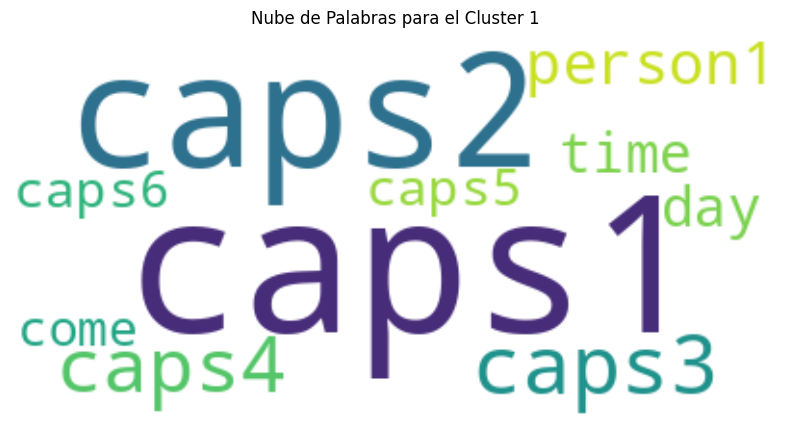

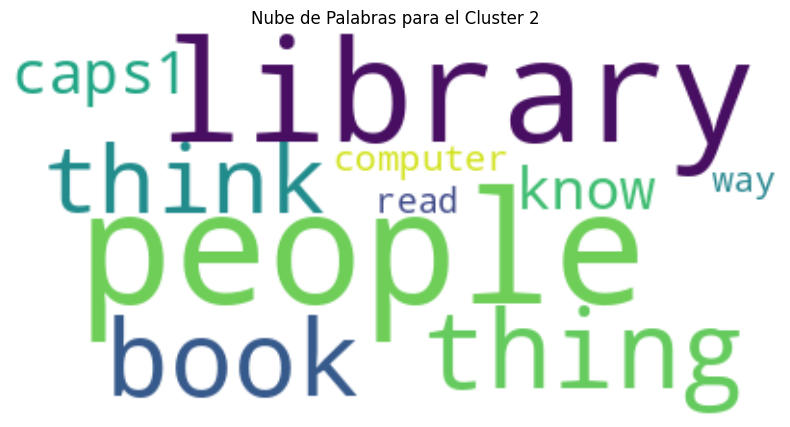

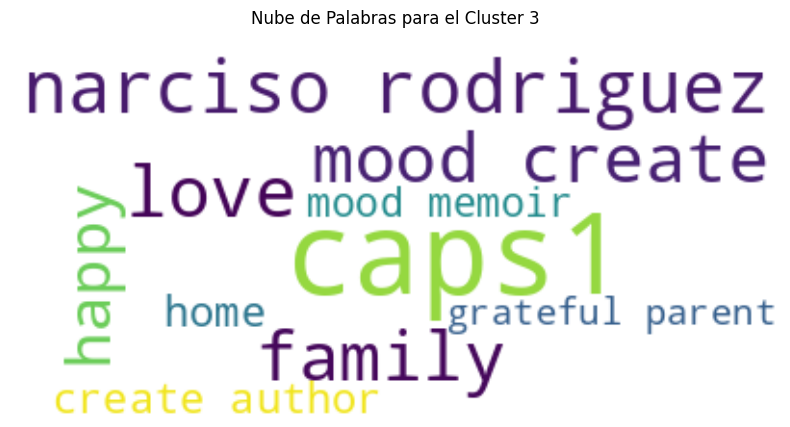

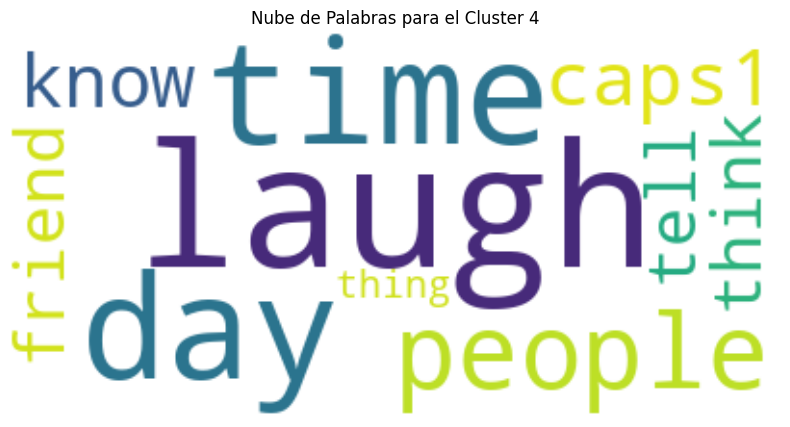

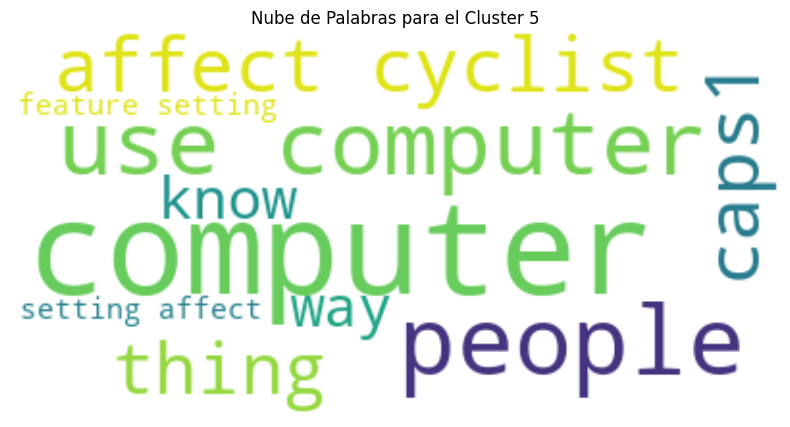

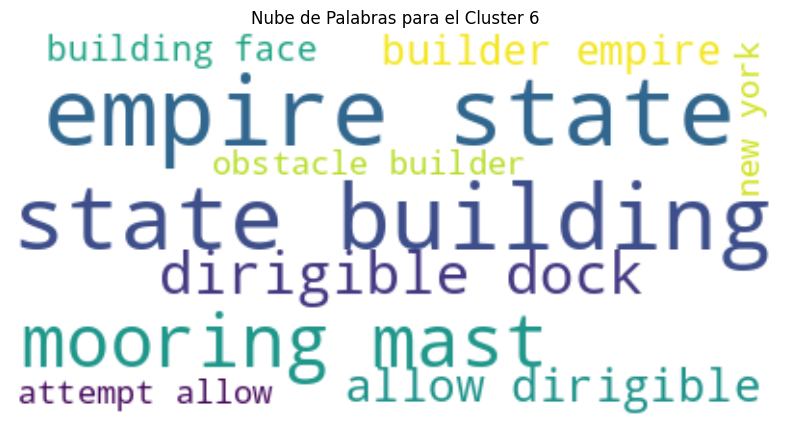

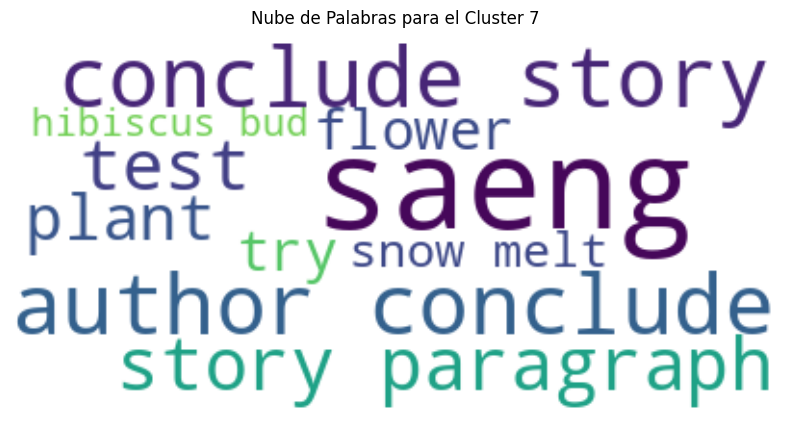

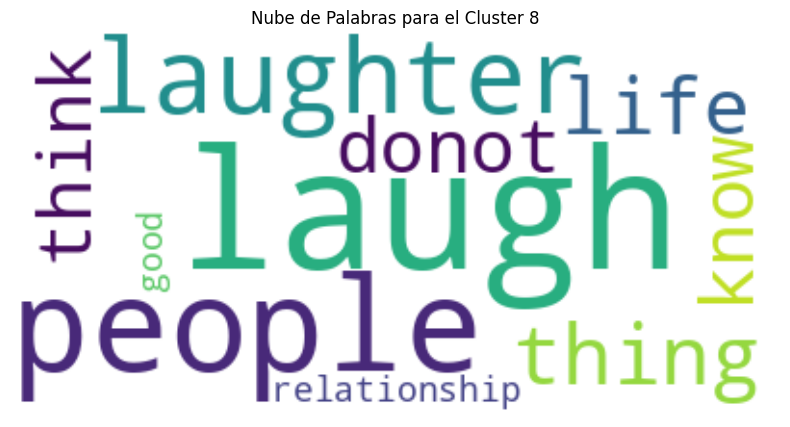

In [ ]:
for i in range(len(topic_list)):
    cluster_texts = data[data['topic'] == i]['essay']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para el Cluster {i+1}')
    plt.show()

## 2. LDA con TF IDF

In [ ]:
%%time
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.029*"cap" + 0.014*"peopl" + 0.013*"person" + 0.010*"time" + 0.009*"friend" + 0.008*"help" + 0.007*"patient" + 0.007*"talk" + 0.007*"book" + 0.007*"wait"
Topic: 1 Word: 0.034*"build" + 0.028*"dirig" + 0.018*"mast" + 0.016*"empir" + 0.015*"moor" + 0.015*"state" + 0.014*"obstacl" + 0.012*"dock" + 0.011*"water" + 0.011*"cap"
Topic: 2 Word: 0.026*"mood" + 0.024*"dirig" + 0.023*"build" + 0.018*"memoir" + 0.017*"parent" + 0.016*"obstacl" + 0.016*"love" + 0.015*"narciso" + 0.015*"famili" + 0.014*"author"
Topic: 3 Word: 0.035*"book" + 0.020*"librari" + 0.016*"cap" + 0.016*"offens" + 0.015*"movi" + 0.014*"read" + 0.012*"child" + 0.011*"shelf" + 0.011*"peopl" + 0.011*"person"
Topic: 4 Word: 0.028*"saeng" + 0.025*"test" + 0.021*"patient" + 0.021*"hibiscu" + 0.019*"stori" + 0.019*"patienc" + 0.017*"author" + 0.015*"conclud" + 0.014*"wait" + 0.014*"spring"
Topic: 5 Word: 0.029*"laugh" + 0.022*"laughter" + 0.021*"cap" + 0.020*"build" + 0.016*"dirig" + 0.010*"person" + 0.010*"empir" +

### Evaluación primer texto

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 3)))


Score: 0.9912375807762146	 
Topic: 0.029*"cap" + 0.014*"peopl" + 0.013*"person"


In [ ]:
ind_with_tfidf = lda_model_tfidf[bow_corpus] # Todos los individuos

In [ ]:
topics_with = []
for y in range(data.shape[0]):
    if len(ind_with_tfidf[y]) > 0:
        valid_sublist = [sublist for sublist in ind_with_tfidf[y] if len(sublist) > 1]
        if len(valid_sublist) > 0:
            max_index = np.argmax([sublist[1] for sublist in valid_sublist])
            topics_with.append(valid_sublist[max_index][0])
        else:
            topics_with.append(None)
    else:
        topics_with.append(None)

In [ ]:
data["topic_tfidf"] = topics_with
data.head(10)

essay  essay_id  topic  \
0  dear local newspaper, think effect computer pe...         1      4   
1  dear @caps1 @caps2, believe use computer benef...         2      4   
2  dear, @caps1 @caps2 @caps3 people use computer...         3      1   
3  dear local newspaper, @caps1 find expert compu...         4      4   
4  dear @location1, know computer positive effect...         5      4   
5  dear @location1, think computer negative effec...         6      1   
6  know people day depend computer safety, natura...         7      4   
7  @percent1 people agree computer life complicat...         8      4   
8  dear reader, @organization1 dramatic effect hu...         9      4   
9  @location1 technology computer. computer good ...        10      4   

   topic_tfidf  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0

In [ ]:
data["topic_tfidf"].value_counts()

topic_tfidf
6    1929
0    1856
2    1836
3    1830
4    1768
1    1712
7    1703
5     342
Name: count, dtype: int64

In [ ]:
data_LDA = data.copy()
data_LDA.head()

essay  essay_id  topic  \
0  dear local newspaper, think effect computer pe...         1      4   
1  dear @caps1 @caps2, believe use computer benef...         2      4   
2  dear, @caps1 @caps2 @caps3 people use computer...         3      1   
3  dear local newspaper, @caps1 find expert compu...         4      4   
4  dear @location1, know computer positive effect...         5      4   

   topic_tfidf  
0            0  
1            0  
2            0  
3            0  
4            0

## Caracterización

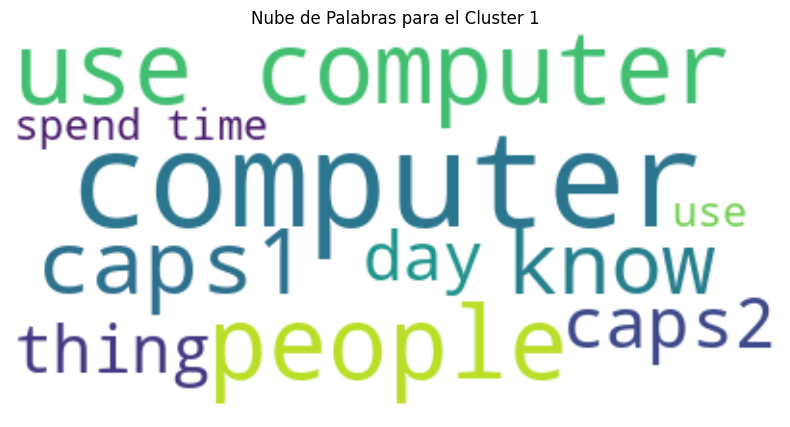

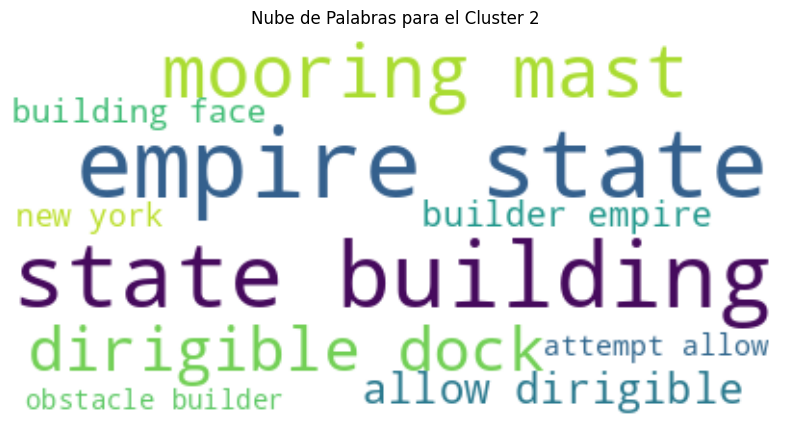

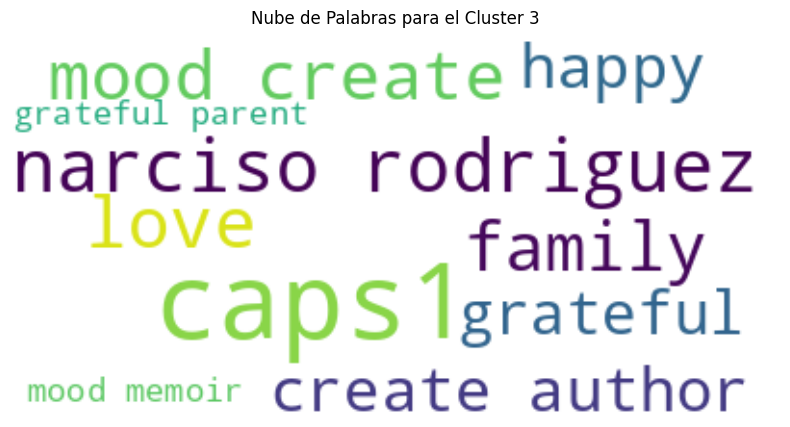

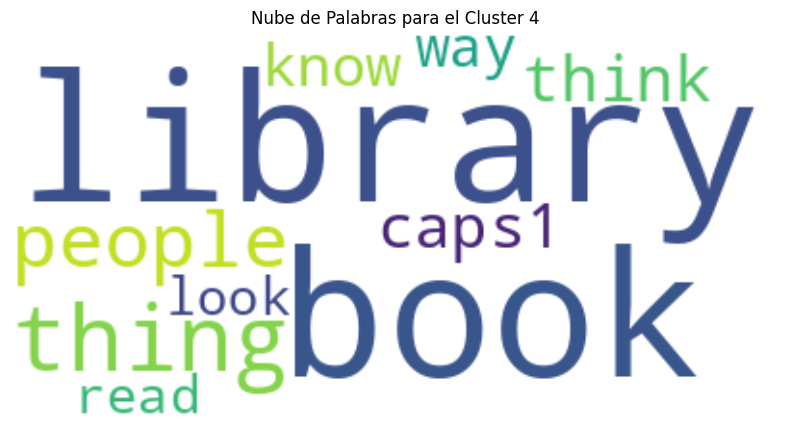

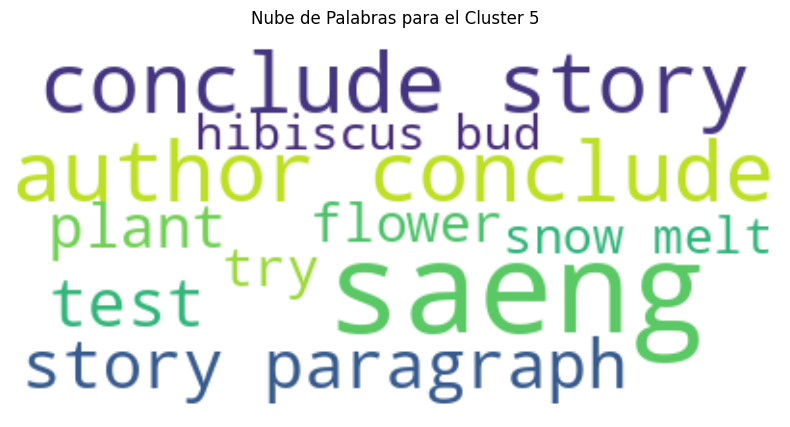

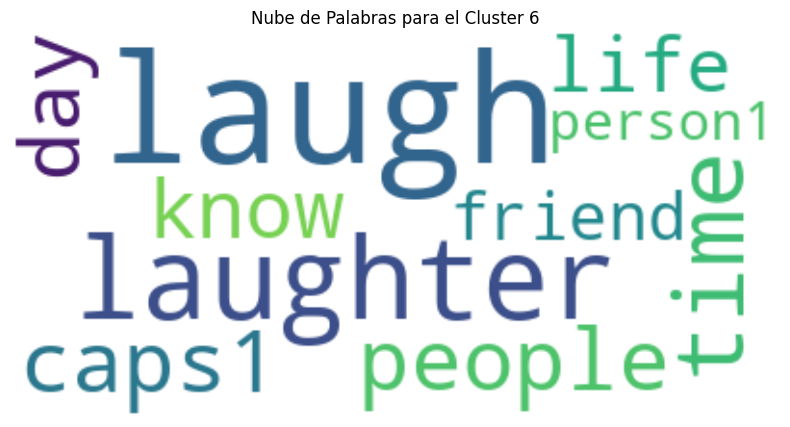

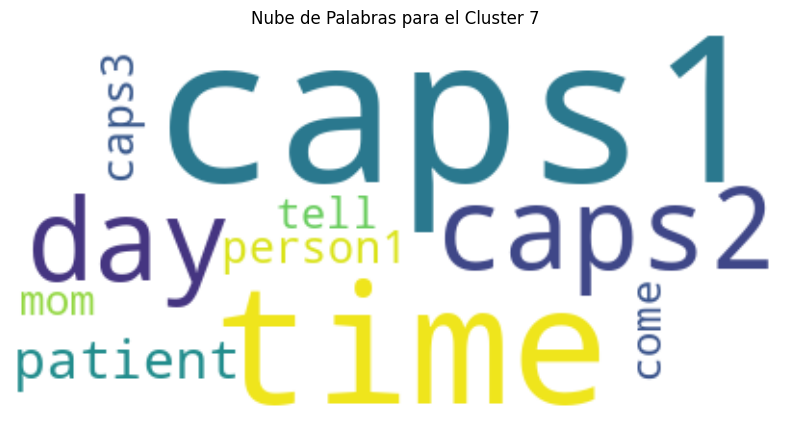

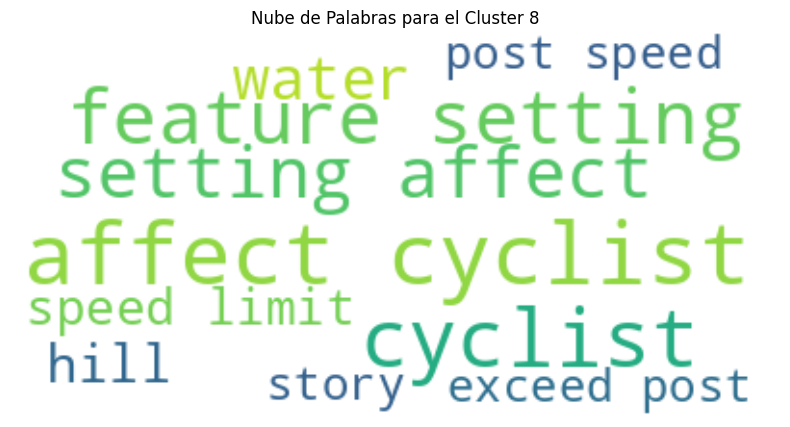

In [ ]:
for i in range(len(topic_list)):
    cluster_texts = data[data['topic_tfidf'] == i]['essay']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para el Cluster {i+1}')
    plt.show()

## 3. Modelo de Lenguaje Natural BERT

### Embeddings

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import spacy

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
data = pd.read_csv(path + 'ensayos_NLP_Ensayos.csv')
data.head(5)

Unnamed: 0                                              essay
0           0  Dear local newspaper, I think effects computer...
1           1  Dear @CAPS1 @CAPS2, I believe that using compu...
2           2  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...
3           3  Dear Local Newspaper, @CAPS1 I have found that...
4           4  Dear @LOCATION1, I know having computers has a...

In [ ]:
data.shape

In [ ]:
data['processed_text'] = data.apply(lambda row:  ' '.join(token.lemma_ for token in nlp(row["essay"]).sents), axis=1)
data['processed_text'] = data['processed_text'].str.lower()
data['processed_text'] = data['processed_text'].replace(list('áéíóú'),list('aeiou'),regex=True)
data['processed_text'] = data['processed_text'].str.replace('[^\w\s]','')
data['processed_text'] = data['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_todas)]))
# data['processed_text'] = data['essay_text'].str.lower().str.replace(r'\W', ' ').str.split()

In [ ]:
data.to_pickle(path + 'training_procesed_text_embeddings.pkl')

In [ ]:
%%time
data=  pd.read_pickle(path + 'training_procesed_text_embeddings.pkl')
data.head(1)

CPU times: user 19.4 ms, sys: 17.7 ms, total: 37.1 ms
Wall time: 78.2 ms


Unnamed: 0                                              essay  \
0           0  Dear local newspaper, I think effects computer...   

                                      processed_text  
0  dear local newspaper, think effect computer pe...

In [ ]:
%%time
# Obtener embeddings con BERT
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    # Usar la representación de la [CLS] token
    cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return cls_embedding.flatten()

# Aplicar BERT a cada texto
data['bert_embedding'] = data['processed_text'].apply(get_bert_embedding)


In [ ]:
data.to_pickle(path + 'training_procesed_text_embeddings_finaaaall.pkl')

In [ ]:
%%time
data=  pd.read_pickle(path + 'training_procesed_text_embeddings_finaaaall.pkl')
data.head(1)

CPU times: user 93.8 ms, sys: 88.1 ms, total: 182 ms
Wall time: 3.08 s


Unnamed: 0                                              essay  \
0           0  Dear local newspaper, I think effects computer...   

                                      processed_text  \
0  dear local newspaper, think effect computer pe...   

                                      bert_embedding  
0  [-0.54188746, -0.23105606, 0.69691604, -0.0412...

In [ ]:
# Convertir embeddings a una matriz para PCA y clustering
embeddings = np.stack(data['bert_embedding'].values)

# Reducción de dimensionalidad con PCA para visualizar
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Crear un DataFrame con las proyecciones PCA
df_pca = pd.DataFrame(embeddings_pca, columns=['x', 'y'])

In [ ]:
pd.DataFrame(embeddings).head()

0         1         2         3         4         5         6    \
0 -0.541887 -0.231056  0.696916 -0.041264 -0.039606 -0.590969  0.509804   
1 -0.653789 -0.089882  0.697059 -0.046488 -0.061337 -0.136907  0.353093   
2 -0.326758 -0.145222  0.612527 -0.094333 -0.172899 -0.487608  0.664414   
3 -0.620315 -0.045451  0.249297 -0.053209 -0.196801 -0.245819  0.390886   
4 -0.463572 -0.256691  0.657806  0.070225  0.052908 -0.274340  0.347791   

        7         8         9    ...       758       759       760       761  \
0  0.316445  0.395594 -0.799818  ...  0.025796 -0.630634  0.087792  0.146731   
1  0.366540  0.497676 -0.917778  ... -0.095797 -0.623317  0.191151  0.210811   
2  0.241754  0.073736 -0.766125  ... -0.074279 -0.469740 -0.045851  0.273385   
3  0.314716  0.291602 -0.652195  ...  0.104378 -0.616306 -0.072775  0.297937   
4  0.291761  0.272353 -0.909611  ... -0.154230 -0.437407 -0.058150  0.205256   

        762       763       764       765       766       767  
0 -0.042942 -0.153810 -0.238875 -0.969579  0.241240  0.278804  
1 -0.060654 -0.288064 -0.170970 -0.952068  0.368050  0.263783  
2  0.113274  0.259449 -0.168722 -0.832281  0.311573  0.207289  
3 -0.086083  0.000904 -0.073952 -0.792513  0.296323  0.068505  
4  0.063590 -0.221512 -0.222165 -0.761303  0.232409  0.131436  

[5 rows x 768 columns]

## Número óptimo de clúster Kmeans - PCA

In [ ]:
from sklearn.metrics import silhouette_score

# Definir el rango de número de clusters que quieres probar
n_max = 10  # Puedes ajustar este valor según lo necesites
silhouette_coefficients = []

# Normalizar los embeddings PCA para que estén escalados entre -1 y 1 (opcional pero recomendado)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(embeddings_pca)

# Probar diferentes números de clusters
for k in range(2, n_max + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_pcs)
    score = silhouette_score(scaled_pcs, kmeans.labels_)
    silhouette_coefficients.append(score)
    print(f"Clusters: {k}, Silhouette Score: {score}")

Clusters: 2, Silhouette Score: 0.4633565843105316
Clusters: 3, Silhouette Score: 0.49198466539382935
Clusters: 4, Silhouette Score: 0.41347405314445496
Clusters: 5, Silhouette Score: 0.414289265871048
Clusters: 6, Silhouette Score: 0.3724207580089569
Clusters: 7, Silhouette Score: 0.38006308674812317
Clusters: 8, Silhouette Score: 0.37872159481048584
Clusters: 9, Silhouette Score: 0.35053926706314087
Clusters: 10, Silhouette Score: 0.35503682494163513


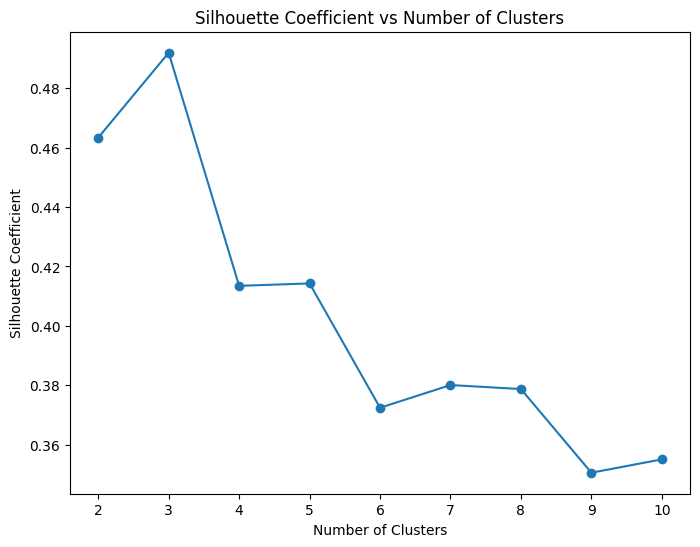

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, n_max + 1), silhouette_coefficients, marker='o')
plt.title('Silhouette Coefficient vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [ ]:
# Clustering de los embeddings con K-Means
kmeans = KMeans(n_clusters=8, random_state=0).fit(embeddings)
data['cluster'] = kmeans.labels_

In [ ]:
data["cluster"].unique()

array([4, 2, 7, 3, 0, 1, 6, 5], dtype=int32)

In [ ]:
data["cluster"].value_counts()

cluster
4    3351
3    2297
0    2171
7    2145
2    1260
5     700
6     685
1     367
Name: count, dtype: int64

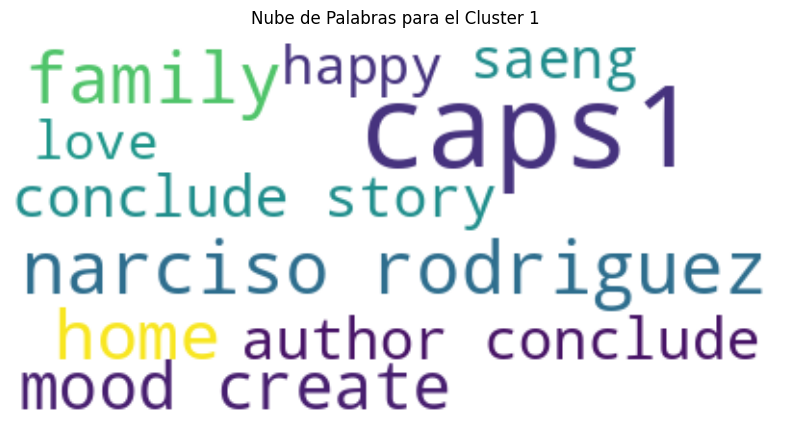

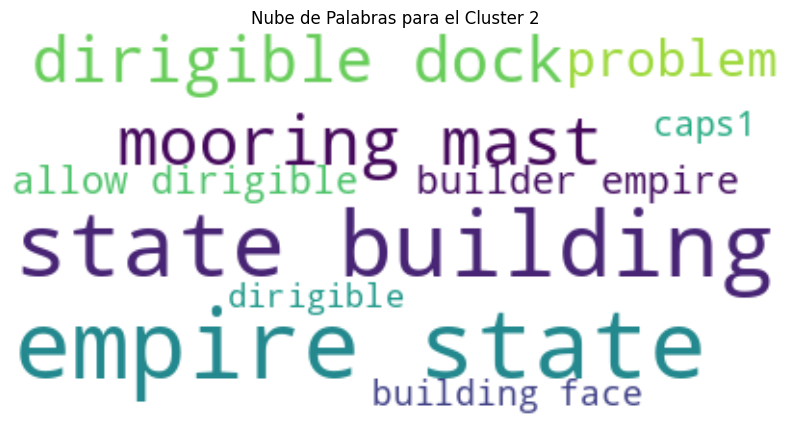

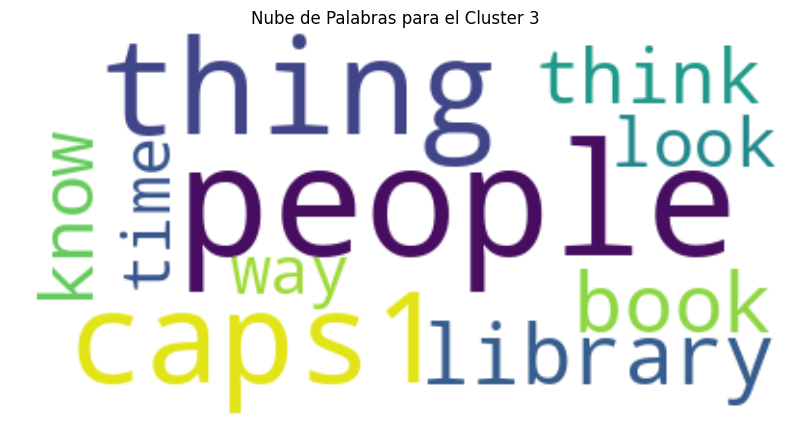

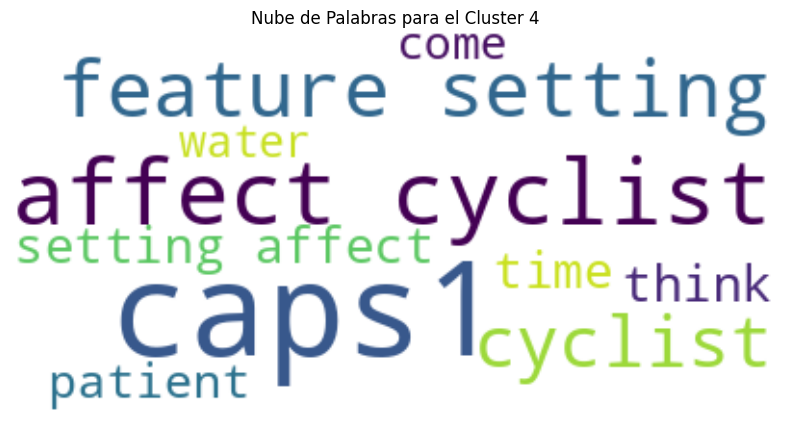

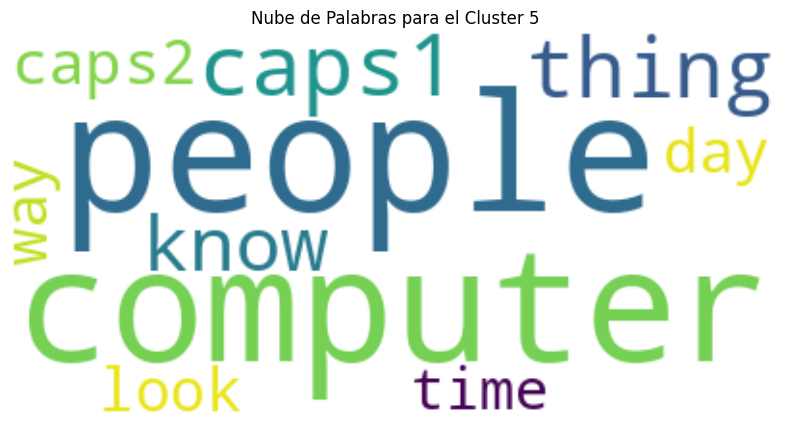

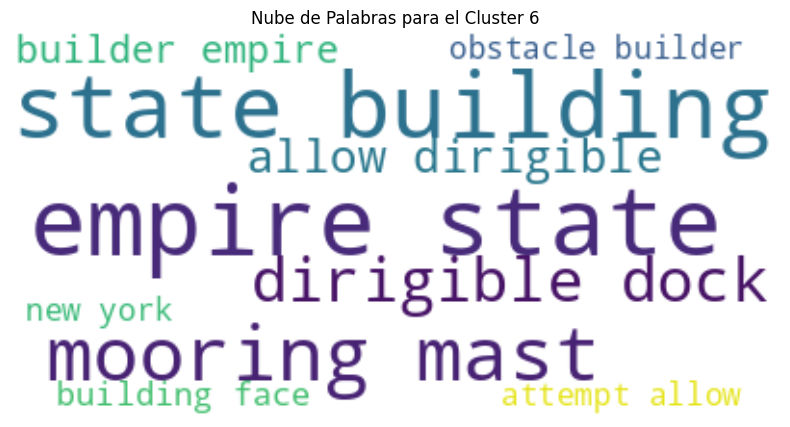

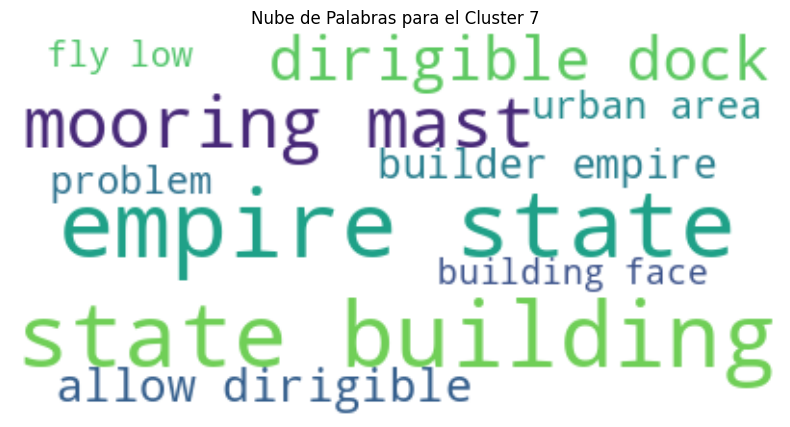

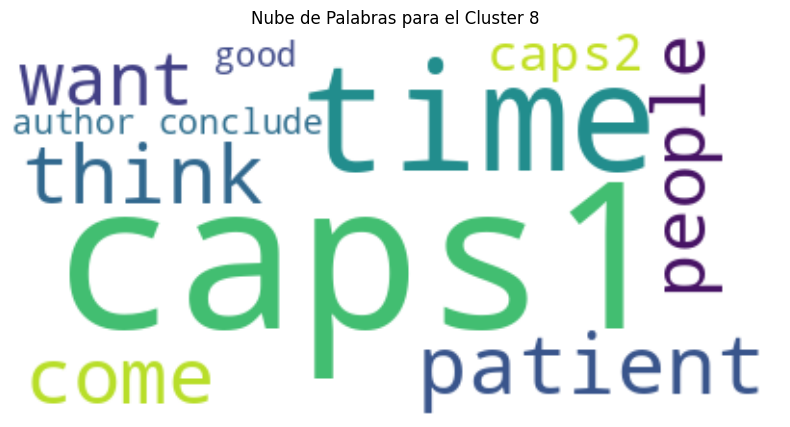

In [ ]:
for i in range(kmeans.n_clusters):
    cluster_texts = data[data['cluster'] == i]['processed_text']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para el Cluster {i+1}')
    plt.show()

## 4. FAST TEXT

In [ ]:
%%time
ft_model = fasttext.train_unsupervised(path + 'ensayos_NLP_Ensayos.csv',dim=300)

In [ ]:
ft_model

In [ ]:
no_doc = np.random.randint(len(datos))
no_doc

In [ ]:
# Volcabulario del embedding
vocabulary = set(ft_model.words)

def doc_word_vectors(words, model, vocabulary, num_features):

    nwords = 0.
    no_found=[]
    doc=[]
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            doc.append(model.get_word_vector(word))
        else:
            no_found.append(word)



    return np.array(doc),no_found

emb0,no_found = doc_word_vectors(datos['tokens'].iloc[no_doc], model=ft_model, vocabulary=vocabulary, num_features=ft_model.dim)

print('Dimensión del Embedding:',emb0.shape)
print('\nPalabras no encontradas:\n\n',no_found)

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.get_word_vector(word))

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.words)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
%%time
ftext_feature_array = averaged_word_vectorizer(corpus=datos['tokens'], model=ft_model, num_features=ft_model.dim)

In [ ]:
doc_embedding = pd.DataFrame(ftext_feature_array)
doc_embedding.head()

In [ ]:
doc_embedding.shape

In [ ]:
doc_embedding.to_csv(path + 'Doc_Embedding_300_NLP_Ensayos.csv')

In [ ]:
%%time
doc_embedding = pd.read_csv(path + 'Doc_Embedding_300_NLP_Ensayos.csv',index_col=0)
doc_embedding.head()

CPU times: user 1.25 s, sys: 80 ms, total: 1.33 s
Wall time: 2.68 s


0         1         2         3         4         5         6  \
0 -0.175322  0.094894 -0.052920 -0.054900  0.121216  0.088556 -0.118475   
1 -0.169163  0.081562 -0.058700 -0.036033  0.116580  0.100855 -0.102996   
2 -0.159469  0.058005 -0.066243 -0.055279  0.110665  0.100373 -0.098978   
3 -0.139838  0.075765 -0.078652 -0.025076  0.092500  0.120348 -0.113918   
4 -0.148552  0.065232 -0.054654 -0.027358  0.093699  0.084818 -0.123655   

          7         8         9  ...       290       291       292       293  \
0 -0.021331 -0.087848  0.008964  ... -0.048509 -0.004096  0.019749 -0.136459   
1 -0.026316 -0.090322 -0.012676  ... -0.046966  0.005901 -0.005477 -0.161278   
2 -0.035843 -0.102814  0.034483  ... -0.025139 -0.021577  0.001063 -0.170196   
3 -0.031224 -0.101528  0.015091  ... -0.021318 -0.019265 -0.016046 -0.154809   
4 -0.024416 -0.098089 -0.002308  ... -0.048402 -0.009872  0.014562 -0.138975   

        294       295       296       297       298       299  
0 -0.011434 -0.044798 -0.131240 -0.031151  0.037504  0.064739  
1 -0.008668 -0.066763 -0.123903 -0.046209  0.028930  0.051048  
2 -0.002960 -0.096786 -0.145178 -0.044546  0.004604  0.060298  
3  0.007257 -0.075218 -0.137204 -0.053576  0.022930  0.059408  
4  0.010195 -0.071346 -0.129877 -0.032587  0.022809  0.061006  

[5 rows x 300 columns]

In [ ]:
pca = PCA(n_components=30, random_state=0)
pcs = pca.fit_transform(doc_embedding.values)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(pcs)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.23722134 0.37641389 0.4890741  0.57232715 0.63001742 0.68099641
 0.71536983 0.73397658 0.74973849 0.76331736 0.7743088  0.78421659
 0.79350676 0.80191792 0.80935242 0.81657814 0.82310112 0.82915969
 0.83488807 0.84037152 0.8454669  0.85018084 0.85486342 0.85900966
 0.86308299 0.86702145 0.87089873 0.87462195 0.87814465 0.88146763]


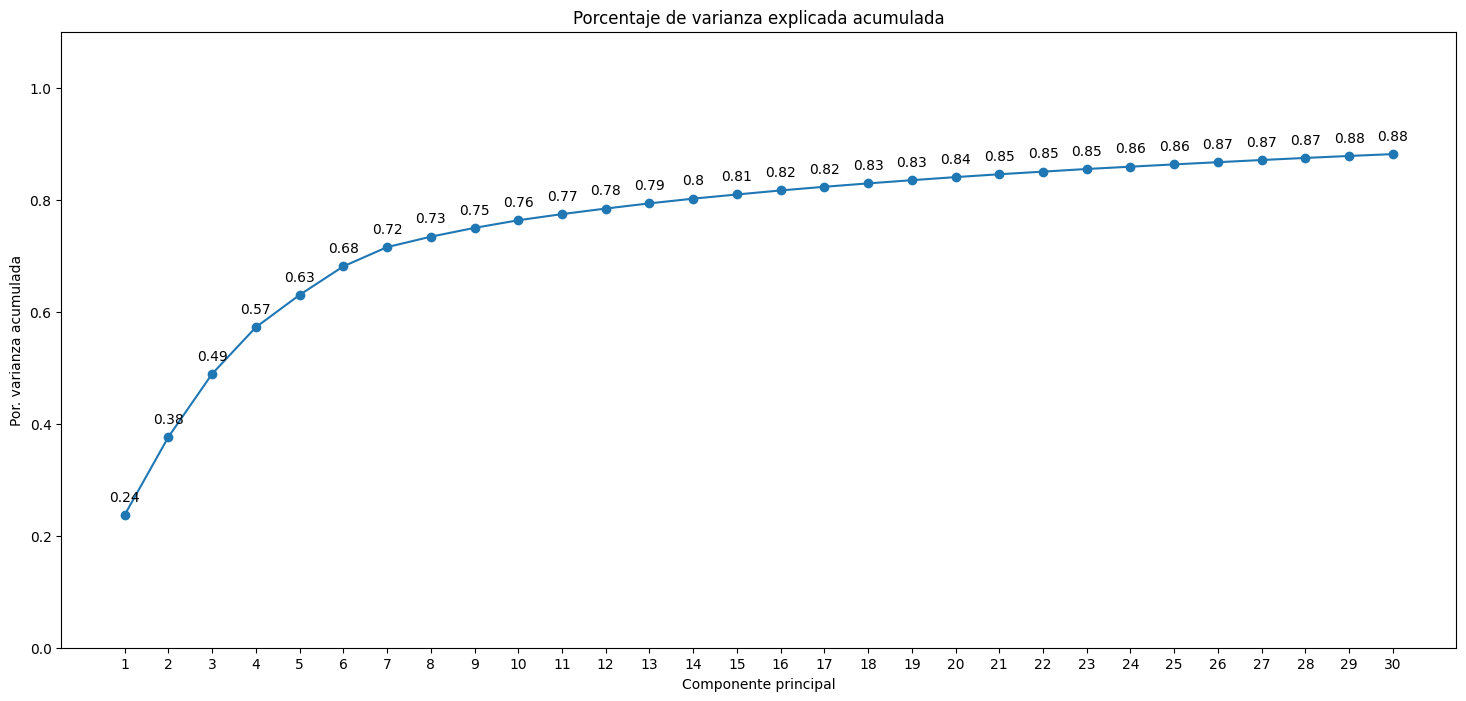

In [ ]:
%matplotlib inline

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

#ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

In [ ]:
%%time
from sklearn.metrics import silhouette_score

n_max = 10
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    score = silhouette_score(scaled_pcs, kmeans.labels_)
    silhouette_coefficients.append(score)

CPU times: user 18.8 s, sys: 6.77 s, total: 25.6 s
Wall time: 20.7 s


In [ ]:
%%time
K_ = 8
km = KMeans(n_clusters=K_, random_state=0)
km.fit_transform(scaled_pcs)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['Grupo'])

CPU times: user 43.6 ms, sys: 29.9 ms, total: 73.5 ms
Wall time: 41 ms


In [ ]:
cluster_labels.value_counts()

Grupo
2        2356
4        1835
6        1785
0        1785
7        1738
1        1690
3        1018
5         769
Name: count, dtype: int64

In [ ]:
data["FAST"] = km.labels_
data.head()

Unnamed: 0                                              essay  \
0           0  Dear local newspaper, I think effects computer...   
1           1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2           2  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3           3  Dear Local Newspaper, @CAPS1 I have found that...   
4           4  Dear @LOCATION1, I know having computers has a...   

                                      processed_text  \
0  dear local newspaper, think effect computer pe...   
1  dear @caps1 @caps2, believe use computer benef...   
2  dear, @caps1 @caps2 @caps3 people use computer...   
3  dear local newspaper, @caps1 find expert compu...   
4  dear @location1, know computer positive effect...   

                                      bert_embedding  cluster  FAST  
0  [-0.54188746, -0.23105606, 0.69691604, -0.0412...        4     4  
1  [-0.6537887, -0.08988242, 0.69705915, -0.04648...        4     4  
2  [-0.32675833, -0.14522223, 0.61252725, -0.0943...        4     4  
3  [-0.62031513, -0.045450754, 0.24929704, -0.053...        4     4  
4  [-0.46357206, -0.25669125, 0.65780556, 0.07022...        4     4

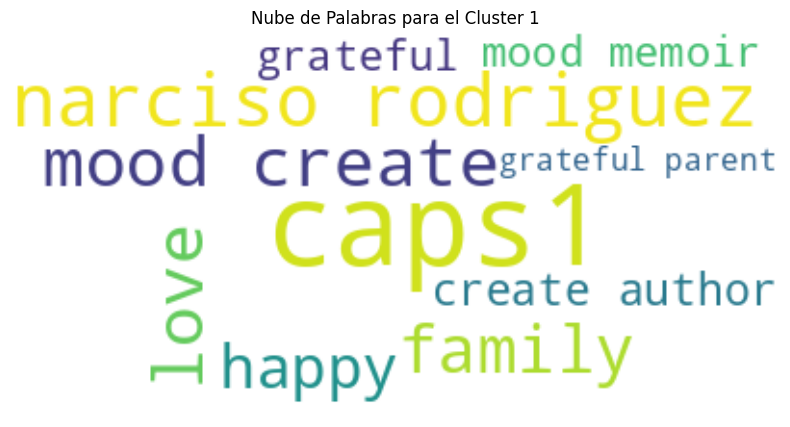

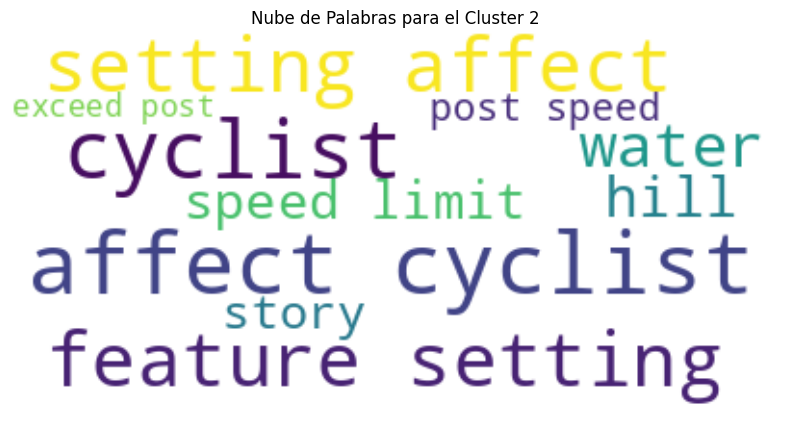

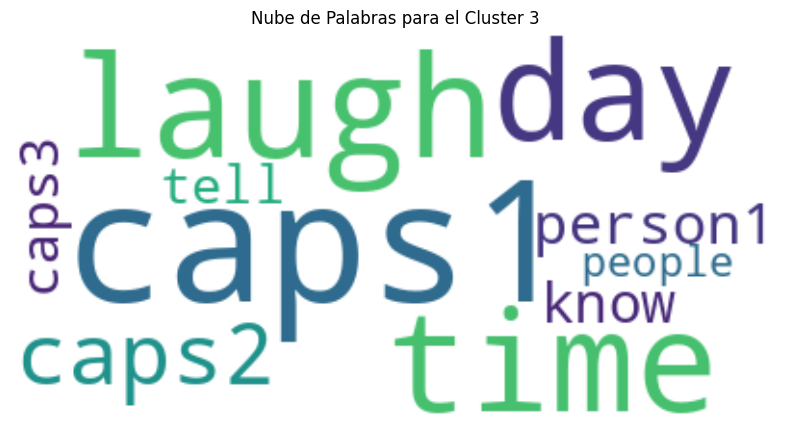

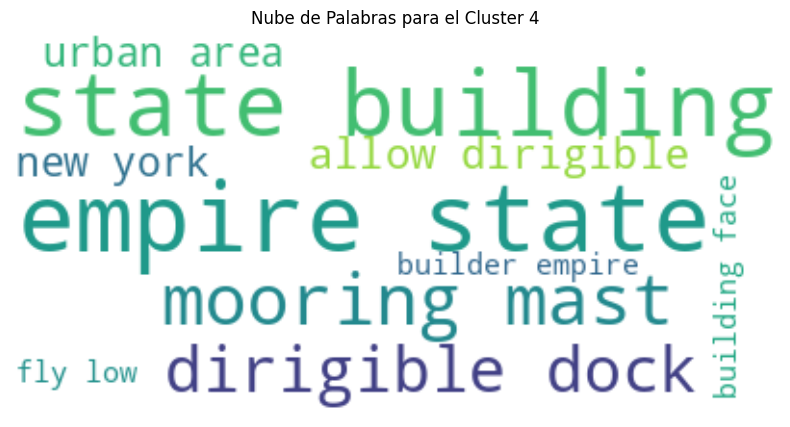

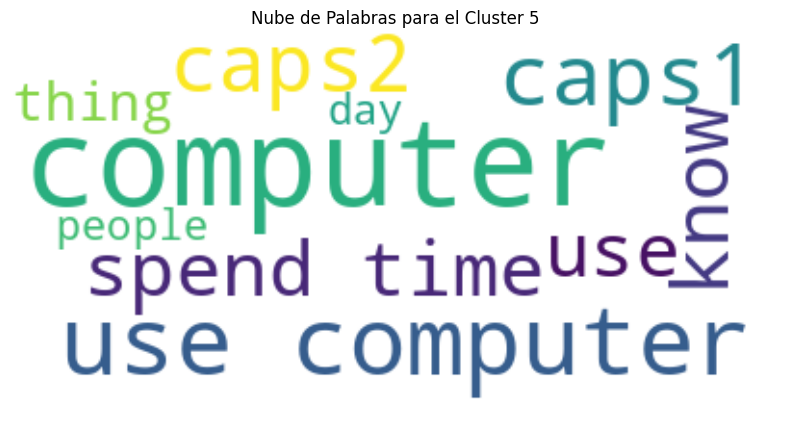

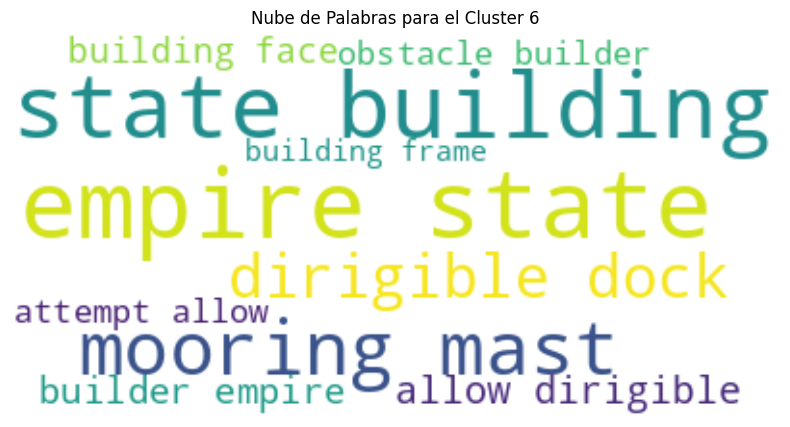

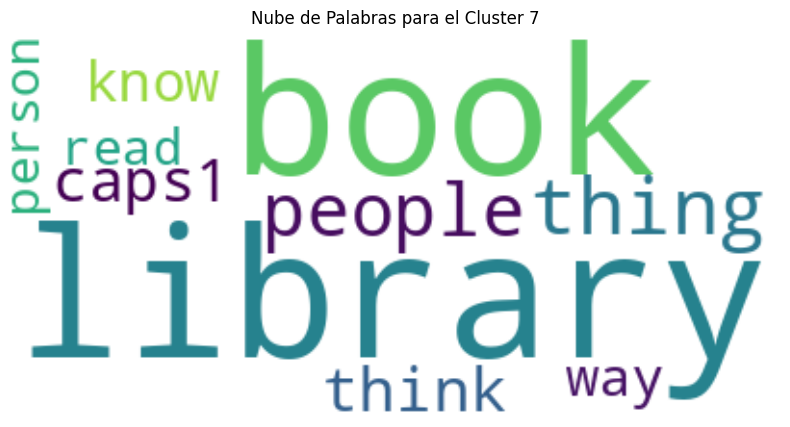

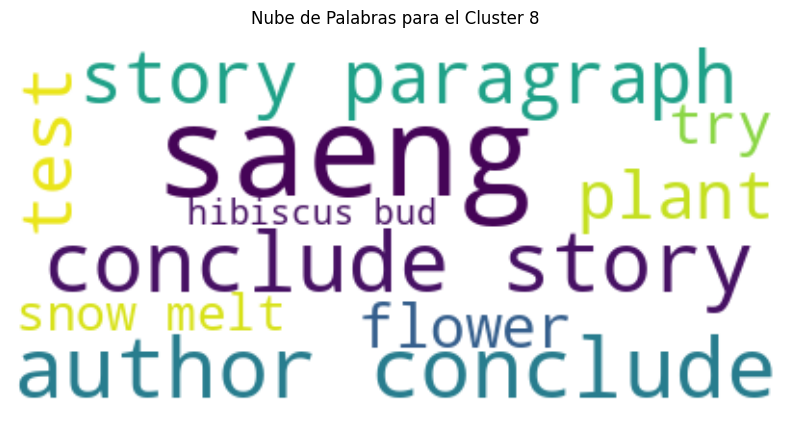

In [ ]:
for i in range(km.n_clusters):
    cluster_texts = data[data['FAST'] == i]['processed_text']
    wordcloud = WordCloud(max_words=10, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras para el Cluster {i+1}')
    plt.show()

# COMPARACION DE LOS METODOS

In [ ]:
data_LDA.head()

essay  essay_id  topic  \
0  dear local newspaper, think effect computer pe...         1      4   
1  dear @caps1 @caps2, believe use computer benef...         2      4   
2  dear, @caps1 @caps2 @caps3 people use computer...         3      1   
3  dear local newspaper, @caps1 find expert compu...         4      4   
4  dear @location1, know computer positive effect...         5      4   

   topic_tfidf  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
data = data.drop(["Unnamed: 0"],axis = 1)
data["essay_id"] = data_LDA["essay_id"].copy()
data.head()

essay  \
0  Dear local newspaper, I think effects computer...   
1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3  Dear Local Newspaper, @CAPS1 I have found that...   
4  Dear @LOCATION1, I know having computers has a...   

                                      processed_text  \
0  dear local newspaper, think effect computer pe...   
1  dear @caps1 @caps2, believe use computer benef...   
2  dear, @caps1 @caps2 @caps3 people use computer...   
3  dear local newspaper, @caps1 find expert compu...   
4  dear @location1, know computer positive effect...   

                                      bert_embedding  cluster  FAST  essay_id  
0  [-0.54188746, -0.23105606, 0.69691604, -0.0412...        4     4         1  
1  [-0.6537887, -0.08988242, 0.69705915, -0.04648...        4     4         2  
2  [-0.32675833, -0.14522223, 0.61252725, -0.0943...        4     4         3  
3  [-0.62031513, -0.045450754, 0.24929704, -0.053...        4     4         4  
4  [-0.46357206, -0.25669125, 0.65780556, 0.07022...        4     4         5

In [ ]:
data_LDA = data_LDA.drop(["essay"],axis = 1)

In [ ]:
print(data.shape[0])
data = pd.merge(data,data_LDA,on = ["essay_id"], how = "left")
print(data.shape[0])

12976
12976


In [ ]:
data.head(10)

essay  \
0  Dear local newspaper, I think effects computer...   
1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3  Dear Local Newspaper, @CAPS1 I have found that...   
4  Dear @LOCATION1, I know having computers has a...   
5  Dear @LOCATION1, I think that computers have a...   
6  Did you know that more and more people these d...   
7  @PERCENT1 of people agree that computers make ...   
8  Dear reader, @ORGANIZATION1 has had a dramatic...   
9  In the @LOCATION1 we have the technology of a ...   

                                      processed_text  \
0  dear local newspaper, think effect computer pe...   
1  dear @caps1 @caps2, believe use computer benef...   
2  dear, @caps1 @caps2 @caps3 people use computer...   
3  dear local newspaper, @caps1 find expert compu...   
4  dear @location1, know computer positive effect...   
5  dear @location1, think computer negative effec...   
6  know people day depend computer safety, natura...   
7  @percent1 people agree computer life complicat...   
8  dear reader, @organization1 dramatic effect hu...   
9  @location1 technology computer. computer good ...   

                                      bert_embedding  cluster  FAST  essay_id  \
0  [-0.54188746, -0.23105606, 0.69691604, -0.0412...        4     4         1   
1  [-0.6537887, -0.08988242, 0.69705915, -0.04648...        4     4         2   
2  [-0.32675833, -0.14522223, 0.61252725, -0.0943...        4     4         3   
3  [-0.62031513, -0.045450754, 0.24929704, -0.053...        4     4         4   
4  [-0.46357206, -0.25669125, 0.65780556, 0.07022...        4     4         5   
5  [-0.285278, -0.0061013815, 0.5753704, -0.17946...        4     4         6   
6  [-0.3384867, -0.041808534, 0.66142625, -0.0182...        4     4         7   
7  [-0.09409154, -0.025338167, 0.52426594, 0.0414...        2     4         8   
8  [-0.5318208, -0.102948576, 0.8215052, -0.06022...        4     4         9   
9  [-0.1133928, -0.3232887, 0.52512604, -0.069337...        4     4        10   

   topic  topic_tfidf  
0      4            0  
1      4            0  
2      1            0  
3      4            0  
4      4            0  
5      1            0  
6      4            0  
7      4            0  
8      4            0  
9      4            0

In [ ]:
data["essay_set"] = df["essay_set"].copy()
data.head(5)

essay  \
0  Dear local newspaper, I think effects computer...   
1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3  Dear Local Newspaper, @CAPS1 I have found that...   
4  Dear @LOCATION1, I know having computers has a...   

                                      processed_text  \
0  dear local newspaper, think effect computer pe...   
1  dear @caps1 @caps2, believe use computer benef...   
2  dear, @caps1 @caps2 @caps3 people use computer...   
3  dear local newspaper, @caps1 find expert compu...   
4  dear @location1, know computer positive effect...   

                                      bert_embedding  cluster  FAST  essay_id  \
0  [-0.54188746, -0.23105606, 0.69691604, -0.0412...        4     4         1   
1  [-0.6537887, -0.08988242, 0.69705915, -0.04648...        4     4         2   
2  [-0.32675833, -0.14522223, 0.61252725, -0.0943...        4     4         3   
3  [-0.62031513, -0.045450754, 0.24929704, -0.053...        4     4         4   
4  [-0.46357206, -0.25669125, 0.65780556, 0.07022...        4     4         5   

   topic  topic_tfidf  essay_set  
0      4            0          1  
1      4            0          1  
2      1            0          1  
3      4            0          1  
4      4            0          1

## essay_set vs topic_tfidf

In [ ]:
crosstabb =pd.crosstab(data["essay_set"],data["topic_tfidf"])
crosstabb

topic_tfidf     0    1     2     3     4     5     6     7
essay_set                                                 
1            1731    1     0     2     0     0    49     0
2               7    0     0  1788     0     0     5     0
3               5   33     2     6     5     0     2  1673
4               7    1     4     9  1740     1     7     1
5               2    0  1789     3     1     0    10     0
6               2    0     0     1     0  1796     0     1
7              16    3     0     7     1     0  1540     2
8               2  423     0     1     0     0   297     0

In [ ]:
assigned_clusters = set()
result = []
for essay_set in crosstabb.index:
    if not crosstabb.loc[essay_set].isna().all():
        best_match_cluster = crosstabb.loc[essay_set].idxmax()
        if best_match_cluster in assigned_clusters:
            for i in range(8):
                if i not in assigned_clusters:
                    best_match_cluster = i
                    break
        assigned_clusters.add(best_match_cluster)
        result.append({
            'essay_set': essay_set,
            'Cat_topic_tfidf': best_match_cluster,
        })
    else:
        result.append({
            'essay_set': essay_set,
            'Cat_topic_tfidf': None
        })
result_df = pd.DataFrame(result)
result_df

essay_set  Cat_topic_tfidf
0          1                0
1          2                3
2          3                7
3          4                4
4          5                2
5          6                5
6          7                6
7          8                1

## essay_set vs topic


In [ ]:
crosstab1 = pd.crosstab(data["essay_set"],data["topic"])
crosstab1

topic        0     1     2    3     4     5     6   7
essay_set                                            
1           74   388     0  162  1140     0     0  19
2           11  1736     0    1     1     0     2  49
3            1     0     1    4  1691    17    10   2
4            7     6     4   14     4     1  1726   8
5           10     1  1782    1     1     0     3   7
6            4     2     0    0     0  1793     1   0
7          764    17    79  699     7     1     1   1
8          246     0    11  372     1     0     0  93

In [ ]:
assigned_clusters = set()
result1 = []
for essay_set in crosstab1.index:
    if not crosstab1.loc[essay_set].isna().all():
        best_match_cluster = crosstab1.loc[essay_set].idxmax()
        if best_match_cluster in assigned_clusters:
            for i in range(8):
                if i not in assigned_clusters:
                    best_match_cluster = i
                    break
        assigned_clusters.add(best_match_cluster)
        result1.append({
            'essay_set': essay_set,
            'Cat_topic': best_match_cluster,
        })
    else:
        result1.append({
            'essay_set': essay_set,
            'Cat_topic': None
        })
result_df1 = pd.DataFrame(result1)
result_df1

essay_set  Cat_topic
0          1          4
1          2          1
2          3          0
3          4          6
4          5          2
5          6          5
6          7          3
7          8          7

## essay_set vs FAST

In [ ]:
crosstab2 = pd.crosstab(data["essay_set"],data["FAST"])
crosstab2

FAST          0     1     2     3     4    5     6     7
essay_set                                               
1             0     1     2     0  1780    0     0     0
2             0     0    22     0    12    0  1766     0
3             1  1687    13     0    19    0     5     1
4             2     2    15     0     7    1     9  1734
5          1782     0    13     1     5    0     1     3
6             0     0     7  1017     5  768     3     0
7             0     0  1563     0     5    0     1     0
8             0     0   721     0     2    0     0     0

In [ ]:
assigned_clusters = set()
result2 = []
for essay_set in crosstab2.index:
    if not crosstab2.loc[essay_set].isna().all():
        best_match_cluster = crosstab2.loc[essay_set].idxmax()
        if best_match_cluster in assigned_clusters:
            for i in range(8):
                if i not in assigned_clusters:
                    best_match_cluster = i
                    break
        assigned_clusters.add(best_match_cluster)
        result2.append({
            'essay_set': essay_set,
            'Cat_FAST': best_match_cluster,
        })
    else:
        result2.append({
            'essay_set': essay_set,
            'Cat_FAST': None
        })
result_df2 = pd.DataFrame(result2)
result_df2


essay_set  Cat_FAST
0          1         4
1          2         6
2          3         1
3          4         7
4          5         0
5          6         3
6          7         2
7          8         5

## essay_set vs BERT

In [ ]:
crosstab3 = pd.crosstab(data["essay_set"],data["cluster"])
crosstab3

cluster       0    1    2     3     4    5    6    7
essay_set                                           
1             3    0  136    62  1555    0    0   27
2             5    0  890    43   799    0    0   63
3            11    5    0  1276   113    0    4  317
4           865    0    9    99   123    0    1  673
5          1269    0    1    19    21    0    0  495
6             0  362    0    23     4  700  680   31
7            12    0   33   749   249    0    0  526
8             6    0  191    26   487    0    0   13

In [ ]:
assigned_clusters = set()
result3 = []
for essay_set in crosstab3.index:
    if not crosstab3.loc[essay_set].isna().all():
        best_match_cluster = crosstab3.loc[essay_set].idxmax()
        if best_match_cluster in assigned_clusters:
            for i in range(8):
                if i not in assigned_clusters:
                    best_match_cluster = i
                    break
        assigned_clusters.add(best_match_cluster)
        result3.append({
            'essay_set': essay_set,
            'Cat_BERT': best_match_cluster,
        })
    else:
        result3.append({
            'essay_set': essay_set,
            'Cat_BERT': None
        })
result_df3 = pd.DataFrame(result3)
result_df3

essay_set  Cat_BERT
0          1         4
1          2         2
2          3         3
3          4         0
4          5         1
5          6         5
6          7         6
7          8         7

In [ ]:
merged_df = result_df.merge(result_df[['essay_set', 'Cat_topic_tfidf']], on='essay_set', how='outer') \
                     .merge(result_df1[['essay_set', 'Cat_topic']], on='essay_set', how='outer') \
                     .merge(result_df2[['essay_set', 'Cat_FAST']], on='essay_set', how='outer') \
                     .merge(result_df3[['essay_set', 'Cat_BERT']], on='essay_set', how='outer')

merged_df.rename(columns={'Cat_topic_tfidf_x': 'Cat_LDA_tfidf'}, inplace=True)
merged_df.drop(columns=['Cat_topic_tfidf_y'], inplace=True)
required_columns = ['Cat_LDA_tfidf', 'Cat_topic', 'Cat_FAST', 'Cat_BERT']
merged_df[required_columns] = merged_df[required_columns].fillna(0).astype('Int64')
comparacion = merged_df

In [ ]:
comparacion

essay_set  Cat_LDA_tfidf  Cat_topic  Cat_FAST  Cat_BERT
0          1              0          4         4         4
1          2              3          1         6         2
2          3              7          0         1         3
3          4              4          6         7         0
4          5              2          2         0         1
5          6              5          5         3         5
6          7              6          3         2         6
7          8              1          7         5         7

## Medición de desempeño de los modelos


## Accuracy Global

In [ ]:
import pandas as pd
import numpy as np

def reorganizar_matriz(crosstab):
    crosstab = crosstab.apply(pd.to_numeric, errors='coerce')
    available_cols = list(crosstab.columns)
    row_order = []
    col_order = []

    for row in crosstab.index:
        max_col = crosstab.loc[row, available_cols].idxmax()
        row_order.append(row)
        col_order.append(max_col)
        available_cols.remove(max_col)
    crosstab_sorted = crosstab.loc[row_order, col_order]
    matriz = crosstab_sorted.values

    return matriz
matrices = [crosstabb, crosstab1, crosstab2, crosstab3]
matrices_reorganizadas = [reorganizar_matriz(mat) for mat in matrices]

matriz_tfidf = matrices_reorganizadas[0]
matriz_topic = matrices_reorganizadas[1]
matriz_fast = matrices_reorganizadas[2]
matriz_bert = matrices_reorganizadas[3]

In [ ]:
matriz_bert

array([[1555,  136,   62,    3,   27,    0,    0,    0],
       [ 799,  890,   43,    5,   63,    0,    0,    0],
       [ 113,    0, 1276,   11,  317,    0,    5,    4],
       [ 123,    9,   99,  865,  673,    0,    0,    1],
       [  21,    1,   19, 1269,  495,    0,    0,    0],
       [   4,    0,   23,    0,   31,  700,  362,  680],
       [ 249,   33,  749,   12,  526,    0,    0,    0],
       [ 487,  191,   26,    6,   13,    0,    0,    0]])

In [ ]:
ac_tfidf =np.diag(matriz_tfidf).sum() * 100 / np.sum(matriz_tfidf)
ac_topic =np.diag(matriz_topic).sum() * 100 / np.sum(matriz_topic)
ac_fast =np.diag(matriz_fast).sum() * 100 / np.sum(matriz_fast)
ac_bert =np.diag(matriz_bert).sum() * 100 / np.sum(matriz_bert)
print(f"\nAccuracy global del modelo LDA TFIDF: {ac_tfidf}")
print(f"\nAccuracy global del modelo LDA : {ac_topic}")
print(f"\nAccuracy global del modelo FAST: {ac_fast}")
print(f"\nAccuracy global del modelo BERT: {ac_bert}")



Accuracy global del modelo LDA TFIDF: 96.17755856966708

Accuracy global del modelo LDA : 55.463933415536374

Accuracy global del modelo FAST: 87.307336621455

Accuracy global del modelo BERT: 44.551479654747226


### Matriz de confusión

## Métricas de una sola clase

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix

In [ ]:
resultados_roc = {}
columnas = ['cluster', 'topic', 'topic_tfidf', 'FAST']

for col in columnas:
    roc_scores = []
    for Clase in range(1, 9):
        prediccion = Clase - 1
        data_final_copia = data.copy()
        data_final_copia.loc[data_final_copia["essay_set"] != Clase, "essay_set"] = -1
        data_final_copia.loc[data_final_copia["essay_set"] == Clase, "essay_set"] = 1
        data_final_copia.loc[data_final_copia["essay_set"] == -1, "essay_set"] = 0

        data_final_copia.loc[data_final_copia[col] != prediccion, col] = -1
        data_final_copia.loc[data_final_copia[col] == prediccion, col] = 1
        data_final_copia.loc[data_final_copia[col] == -1, col] = 0

        ytrue = list(data_final_copia["essay_set"])
        yest = list(data_final_copia[col])
        roc_score = roc_auc_score(ytrue, yest)
        roc_scores.append(roc_score)
    resultados_roc[col] = roc_scores
resultados_df = pd.DataFrame(resultados_roc, index=range(1, 9))
resultados_df.index.name = 'essay_set'
resultados_df.to_csv(path + 'roc_scores.csv')
print(resultados_df)

            cluster     topic  topic_tfidf      FAST
essay_set                                           
1          0.403995  0.474160     0.983586  0.420263
2          0.483581  0.963700     0.479375  0.424392
3          0.444000  0.416912     0.420890  0.399633
4          0.429894  0.448672     0.421871  0.454578
5          0.356771  0.372983     0.422128  0.419477
6          0.694444  0.997206     0.998844  0.713289
7          0.469975  0.423962     0.974540  0.422121
8          0.421991  0.560806     0.431568  0.429079


### RED NEURONAL YA QUE EL MEJOR MODELO FUE EL DE FAST TEXT SEGUN EL ACCURACY GLOBAL SE USARA ESE

## Definición de $X$ (Features) e $y$

In [ ]:
datos=  pd.read_pickle(path + 'training_red_neuronal.pkl')

In [ ]:
datos.head()

essay_id                                              essay  \
0         1  Dear local newspaper, I think effects computer...   
1         2  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4  Dear Local Newspaper, @CAPS1 I have found that...   
4         5  Dear @LOCATION1, I know having computers has a...   

                                              tokens  essay_set  corrections  \
0  [Dear, local, newspaper, ,, I, think, effects,...          1            8   
1  [Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...          1           11   
2  [Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...          1           13   
3  [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...          1            6   
4  [Dear, @LOCATION1, ,, I, know, having, compute...          1            7   

   token_count  unique_token_count  nostop_count  sent_count  ner_count  ...  \
0          396                 180           386          16          3  ...   
1          460                 211           444          21         13  ...   
2          310                 164           302          14          7  ...   
3          577                 267           565          29         21  ...   
4          519                 212           501          30          6  ...   

   adj  pron  verb  cconj  adv  det  propn  num  part  intj  
0   17    47    53     14   15   21      5    0    16     2  
1   18    52    69     18   20   30      9    4    10     0  
2   19    26    39     16   11   24      7    3    10     1  
3   40    31    70     17   23   43     38    0    23     1  
4   29    41    59     16   32   50      3    4    20     0  

[5 rows x 33 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_provisional = datos.get(["corrections","token_count"]) # dos variables al azar
y_provisional = datos.get(["essay_set"]).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_provisional,y_provisional,test_size = 0.10,stratify = y_provisional)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(11678, 2)
(11678, 1)
(1298, 2)
(1298, 1)


In [ ]:
index_train = X_train.index
index_train

Index([  996, 10535,  7941,   614,  9501,  4308,  8165,   492,  1233,  4190,
       ...
       11804,  5617,  7559, 10185,  7030,  7786,  9153,  3832, 12535, 12207],
      dtype='int64', length=11678)

In [ ]:
index_test = X_test.index
index_test

Index([ 2444,   909,  4331,     3, 12545, 12591, 10022,  4768,  8374, 10214,
       ...
       11655, 12028,  5241,  5364,   170,  8140,  7743,  8532,  5420,  6498],
      dtype='int64', length=1298)

In [ ]:
features = [x for x in datos.columns if x not in ["essay_set","essay","tokens","essay_id"]]

X = datos.get(features).copy()
y = datos.get(["essay_set"]).copy()

## Muestra de entrenamiento y de test

In [ ]:
print(X.shape) # features
print(doc_embedding.shape) # embeddings

(12976, 29)
(12976, 300)


In [ ]:
# Entrenamiento
features_train = X.iloc[index_train,]
embeddings_train = doc_embedding.iloc[index_train,]
y_train = y.iloc[index_train,] # supervisada

# Test
features_test = X.iloc[index_test,]
embeddings_test = doc_embedding.iloc[index_test,]
y_test = y.iloc[index_test,] # supervisada

print(y_train.shape)
print(y_test.shape)

(11678, 1)
(1298, 1)


In [ ]:
y_train = y_train - 1
y_test = y_test - 1

In [ ]:
features_train.head()

corrections  token_count  unique_token_count  nostop_count  sent_count  \
996              5          664                 282           648          36   
10535            2          151                  97           148           8   
7941             2          138                  71           138           7   
614              8          471                 189           464          21   
9501             1          150                  86           146           8   

       ner_count  comma  question  exclamation  quotation  ...  adj  pron  \
996            9     33         0            2         10  ...   44    41   
10535          5      1         0            0          3  ...   13    10   
7941          18      8         0            0          8  ...    8     9   
614            7     16         0            1          3  ...   29    50   
9501           3      3         0            0          2  ...   12     6   

       verb  cconj  adv  det  propn  num  part  intj  
996      83     26   35   34     12    3    21     1  
10535    16      3    8   18      5    0     1     0  
7941     17      0    5    7     18    2     5     0  
614      64      8   28   36      7    0     7     0  
9501     16      3    3   24      6    0     7     0  

[5 rows x 29 columns]

## Procesamiento de datos cuantitativos (Estandarización)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1.0,1.0))

features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train))
features_train_scaled.columns = features_train.columns
features_test_scaled = pd.DataFrame(scaler.fit_transform(features_test))
features_test_scaled.columns = features_test.columns

## Modelo supervisado (Red neuronal densa FCNN)

Fully conected neural network

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

In [ ]:
doc_embedding.shape

(12976, 300)

In [ ]:
features_train_scaled.head(2)

corrections  token_count  unique_token_count  nostop_count  sent_count  \
0    -0.916667     0.061748            0.117764      0.045307   -0.333333   
1    -0.966667    -0.761026           -0.620758     -0.763754   -0.866667   

   ner_count     comma  question  exclamation  quotation  ...       adj  \
0  -0.785714 -0.108108      -1.0    -0.851852  -0.809524  ... -0.022222   
1  -0.880952 -0.972973      -1.0    -1.000000  -0.942857  ... -0.711111   

       pron      verb     cconj       adv       det     propn       num  \
0 -0.632287 -0.077778 -0.257143 -0.247312 -0.358491 -0.752577 -0.818182   
1 -0.910314 -0.822222 -0.914286 -0.827957 -0.660377 -0.896907 -1.000000   

       part      intj  
0 -0.288136 -0.888889  
1 -0.966102 -1.000000  

[2 rows x 29 columns]

In [ ]:
features_train_scaled.shape

(11678, 29)

In [ ]:
features_train_scaled.shape[1]

29

In [ ]:
embedding_vector_length = 300

x1 = Input(shape=(embedding_vector_length,), name='Input_Embedding')
x2 = Input(shape=(features_train_scaled.shape[1],), name='Input_Features')

# Capa entrada
x = Concatenate(name='Concatenar')([x1, x2])
x = Dropout(0.25)(x)

# capas ocultas
x = Dense(64, activation='elu', name='Capa_Densa_1')(x)
x = Dropout(0.25)(x)
x = Dense(32, activation='elu', name='Capa_Densa_2')(x)
x = Dropout(0.25)(x)
x = Dense(16, activation='elu', name='Capa_Densa_3')(x)
x = Dropout(0.25)(x)

# Capa de salida para clasificación binaria
x = Dense(8, activation='softmax', name='Output')(x)

model = Model(inputs=[x1, x2], outputs=x)

# Compilación para clasificación binaria
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_Embedding           │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Input_Features            │ (None, 29)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Concatenar (Concatenate)  │ (None, 329)            │              0 │ Input_Embedding[0][0], │
│                           │                        │                │ Input_Features[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 329)            │              0 │ Concatenar[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Capa_Densa_1 (Dense)      │ (None, 64)             │         21,120 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 64)             │              0 │ Capa_Densa_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Capa_Densa_2 (Dense)      │ (None, 32)             │          2,080 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 32)             │              0 │ Capa_Densa_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Capa_Densa_3 (Dense)      │ (None, 16)             │            528 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 16)             │              0 │ Capa_Densa_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output (Dense)            │ (None, 8)              │            136 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,864 (93.22 KB)

 Trainable params: 23,864 (93.22 KB)

 Non-trainable params: 0 (0.00 B)

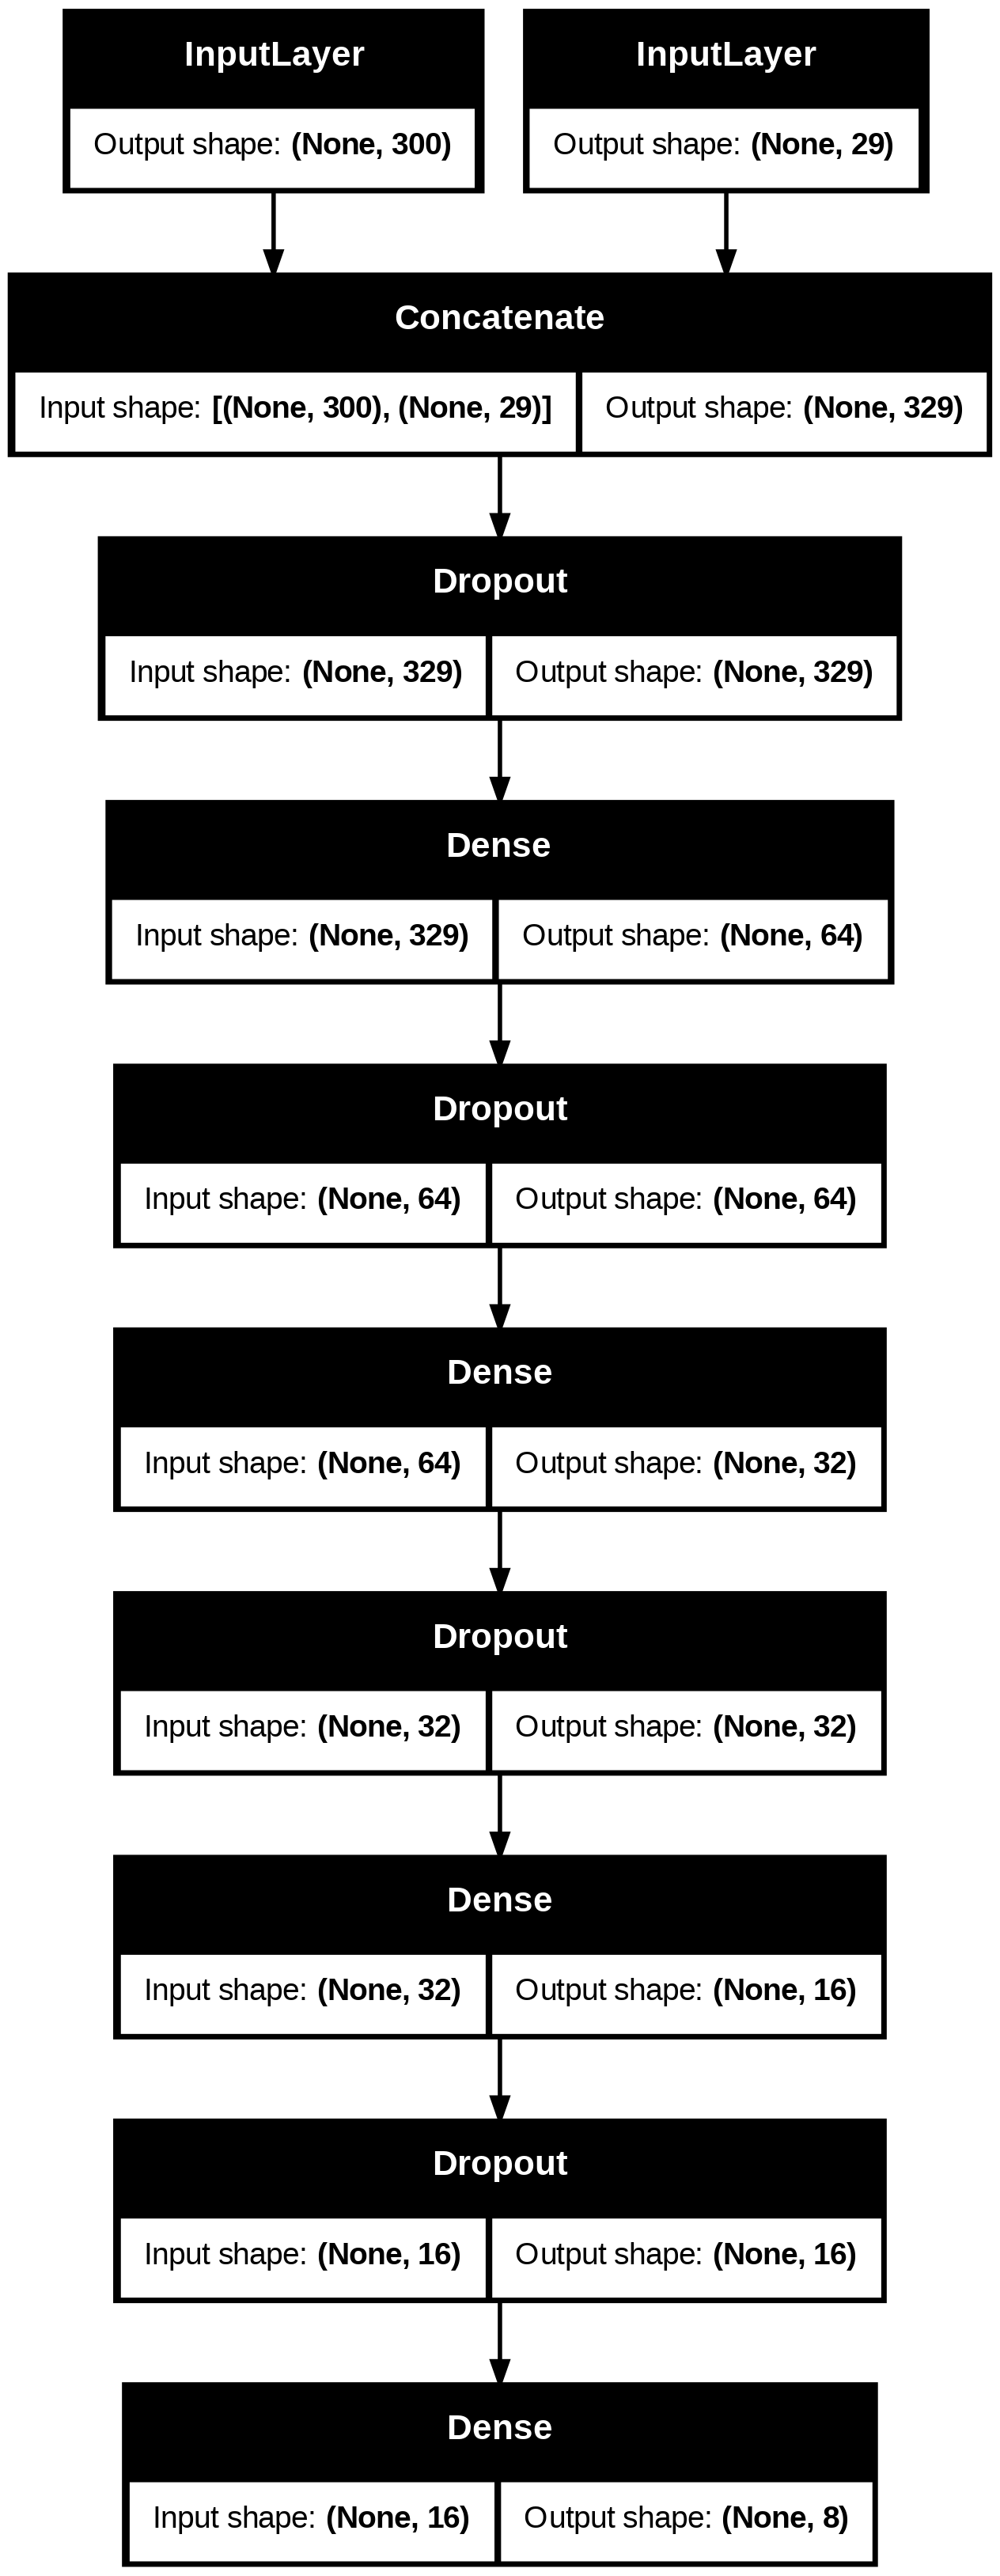

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
%%time
history = model.fit(x = [embeddings_train,features_train_scaled],
                    y = y_train,
                    validation_data = ([embeddings_test,features_test_scaled],y_test),
                    epochs=100,
                    batch_size=32,verbose=1)

Epoch 1/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4572 - loss: 1.4838 - val_accuracy: 0.9438 - val_loss: 0.2241
Epoch 2/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8976 - loss: 0.3508 - val_accuracy: 0.9807 - val_loss: 0.0816
Epoch 3/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9324 - loss: 0.2335 - val_accuracy: 0.9831 - val_loss: 0.0630
Epoch 4/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9461 - loss: 0.1872 - val_accuracy: 0.9792 - val_loss: 0.0671
Epoch 5/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9535 - loss: 0.1671 - val_accuracy: 0.9838 - val_loss: 0.0465
Epoch 6/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9587 - loss: 0.1419 - val_accuracy: 0.9869 - val_loss: 0.0420
Epoch 7/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9622 - loss: 0.1376 - val_accuracy: 0.9892 - val_loss: 0.0397
Epoch 8/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9605 - loss: 0.1375 - val_accu

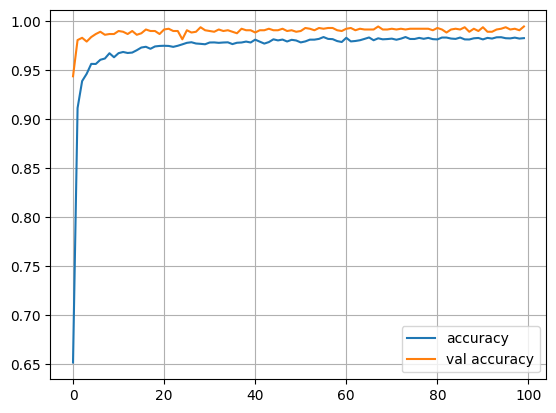

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid()
plt.show()

## Predicciones train

In [ ]:
y_pred = model.predict([embeddings_train,features_train_scaled])
y_true = y_train

365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
y_pred

array([[9.9999720e-01, 1.7947477e-06, 6.2964932e-07, ..., 4.0206519e-08,
        2.6244747e-08, 1.2963051e-07],
       [2.9727984e-12, 3.7043785e-10, 1.6928993e-07, ..., 9.9999982e-01,
        1.5942605e-14, 4.7745557e-15],
       [6.8761686e-15, 1.0587735e-11, 2.4779025e-08, ..., 1.1258546e-12,
        2.0772186e-13, 3.8690301e-11],
       ...,
       [3.7092555e-11, 3.7282019e-10, 9.9999988e-01, ..., 1.5859010e-08,
        8.2374543e-09, 2.8947966e-09],
       [1.0749863e-08, 2.8182822e-06, 3.3186753e-09, ..., 1.9454620e-11,
        2.3224526e-05, 9.9997389e-01],
       [1.1865766e-06, 6.1289785e-07, 9.4470652e-06, ..., 2.0942673e-08,
        9.9736136e-01, 2.6245026e-03]], dtype=float32)

In [ ]:
y_pred = (y_pred >= 0.5).astype(int)

In [ ]:
np.sum(y_pred)

11653

## Evaluación de Train

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcula el accuracy usando las clases
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.993320774105155


In [ ]:
y_pred_probs = model.predict([embeddings_train, features_train_scaled])
roc_auc = roc_auc_score(y_true, y_pred_probs, multi_class='ovr')
print("ROC AUC Score:", roc_auc)


365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
ROC AUC Score: 0.9999235207522696


## predicciones de test

In [ ]:
y_pred = model.predict([embeddings_test,features_test_scaled])
y_true = y_test

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = (y_pred>=0.5).astype(int)

In [ ]:
y_pred_classes1 = np.argmax(y_pred, axis=1)

# Calcula el accuracy usando las clases
accuracy1 = accuracy_score(y_true, y_pred_classes1)
print("Accuracy:", accuracy1)

Accuracy: 0.9930662557781201


In [ ]:
y_pred_probs1 = model.predict([embeddings_test, features_test_scaled])
roc_auc = roc_auc_score(y_test, y_pred_probs1, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
ROC AUC Score: 0.9999365871063313
